In [23]:
#  !pip install sidetable
#  !pip install tabulate

#sns.__version__

In [24]:
import pandas as pd;import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sidetable as stb

from IPython.display import HTML, display
import tabulate
import re
%matplotlib inline

In [25]:
#df1 = pd.read_csv("new11.csv")
#df1.head()

In [26]:
#df1 = df1.drop_duplicates()

In [27]:
#df2 = pd.read_csv("new4.csv")
#df2.head()

In [28]:
##df1.rename(columns = {'date': 'date_assignment'},inplace=True)

In [29]:
#df1.drop(['week_from','week_to'],axis=1,inplace=True)

In [30]:
#df1.info()

In [31]:
#df2.info()

In [32]:
#df1_index = df1.set_index(['code_module','code_presentation','id_student'])

In [33]:
#df2_index = df2.set_index(['code_module','code_presentation','id_student'])

In [34]:
#df3_index = df1_index.join(df2_index,how='inner')

In [35]:
#df3_index.shape

In [36]:
#df3 = df1.merge(df2,how='left',on=['code_module','code_presentation','id_student'])

In [37]:
#df3.shape

In [38]:
#df4 = df3.sample(frac=0.002)

In [39]:
#df4['code_module'].value_counts()

In [40]:
##df4.shape

In [41]:
#df4.to_csv('finalds.csv',index=False)

In [42]:
#df=df4

## Read the data to Pandas Data Frame

In [43]:
df = pd.read_csv("finalds.csv")
df.head()

,code_module,code_presentation,id_student,id_site,date_assignment,sum_click,activity_type,id_assessment,assessment_type,weight,...,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_unregistration
0,FFF,2013J,601180,716643,153,1,subpage,34873,TMA,12.5,...,Scotland,HE Qualification,70-80%,35-55,0,60,N,Withdrawn,-45.0,186.0
1,DDD,2013B,369908,547945,140,1,subpage,25346,CMA,3.0,...,Scotland,HE Qualification,70-80%,35-55,0,60,N,Pass,-82.0,NaN
2,EEE,2014B,485920,790934,102,1,url,30714,TMA,16.0,...,East Anglian Region,Lower Than A Level,60-70%,0-35,0,30,N,Pass,-22.0,NaN
3,DDD,2013B,2501479,547816,1,2,url,25343,CMA,3.0,...,Scotland,HE Qualification,40-50%,35-55,0,60,N,Fail,-24.0,NaN
4,DDD,2013J,498821,673519,-15,1,homepage,25348,TMA,10.0,...,Yorkshire Region,Lower Than A Level,20-30%,0-35,0,60,N,Pass,-203.0,NaN


## Data Report

In [44]:
#Shape of the Data
print('****Shape of the hotel data****')
print('********************************')
print('No of rows\t:\t{}\nNo of columns\t:\t{}'.format(df.shape[0],df.shape[1]))

****Shape of the hotel data****
********************************
No of rows	:	165109
No of columns	:	25


In [45]:
print('****Show infomation of the train data****')
print('***********************************')
df.info()

****Show infomation of the train data****
***********************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165109 entries, 0 to 165108
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   code_module                 165109 non-null  object 
 1   code_presentation           165109 non-null  object 
 2   id_student                  165109 non-null  int64  
 3   id_site                     165109 non-null  int64  
 4   date_assignment             165109 non-null  int64  
 5   sum_click                   165109 non-null  int64  
 6   activity_type               165109 non-null  object 
 7   id_assessment               165109 non-null  int64  
 8   assessment_type             165109 non-null  object 
 9   weight                      165109 non-null  float64
 10  module_presentation_length  165109 non-null  int64  
 11  date_submitted              165109 non-null  int64  

In [46]:
#Check for duplicate values
print('****Duplicates data in the train dataset without EmployeeID Column****')
print('**********************************************************************')

dups = df.loc[:, ~df.columns. isin(['EmployeeID'])].duplicated().sum()
if dups ==0:
    print('There is no duplicate values in the data.') 
else:
    print('There are {} duplicates in the data which is {}% of total data'.format(dups,round((dups/df.shape[0])*100,2)))

****Duplicates data in the train dataset without EmployeeID Column****
**********************************************************************
There is no duplicate values in the data.


In [47]:
#Check for missing value
print('****Missing Values in the Dataset****')
print('*************************************')
msv = df.isnull().sum()[df.isnull().sum()>0]
if msv.empty:
    print('There is no missing values in the data.') 
else:
    for i in range(msv.count()):
        print('{} Missing values in {} which is {}% of total data ({})'.format(msv[i],msv.index[i],round(((msv[i]/df.shape[0])*100),2),df[msv.index[i]].dtype))

****Missing Values in the Dataset****
*************************************
80 Missing values in score which is 0.05% of total data (float64)
10080 Missing values in imd_band which is 6.11% of total data (object)
1 Missing values in date_registration which is 0.0% of total data (float64)
159096 Missing values in date_unregistration which is 96.36% of total data (float64)


In [48]:
def display_dataframe(df,dtypeval):
    numeric_col_mask = df.dtypes.apply(lambda d: issubclass(np.dtype(d).type, dtypeval))

    # Dict used to center the table headers
    d = dict(selector="th",
        props=[('text-align', 'left')])

    # Style
    display(df.style.set_properties(subset=df.columns[numeric_col_mask], 
                            **{'width':'15em', 'height':'3em','text-align':'left','border-color':'White','border-width':'thin'})\
            .set_properties(subset=df.columns[~numeric_col_mask], 
                            **{'width':'15em', 'text-align':'left','border-color':'White','border-width':'thin'})\
            .format(lambda x: '{:,.0f}'.format(x) if x > 1e3 else '{:,.2f}'.format(x), # format the numeric values
                    subset=pd.IndexSlice[:,df.columns[numeric_col_mask]])\
            .hide_index()\

#            .highlight_max('color: green')\
            .set_table_styles([d])) # center the header

In [49]:
def check_sp(Vars,fixit,data_df):
  tot = len(Vars['num'])+len(Vars['chars'])

  s = [[None for j in range(3)] for i in range(tot)]
  i=0
  for type_var in Vars:
    for var in Vars[type_var]:
      livars=[]
      li=data_df[var].unique()
      if(type_var=='num'):
        livars = list(filter(lambda x: (str(x).replace('.','').isdigit()!=True and str(x)!='nan'),li))
        if(fixit==True):
          for k in livars:
            data_df[var].replace(k,np.nan,inplace=True)
      else:
        li1 = list(filter(lambda x: (str(x).replace(' ','').isalpha()!=True and str(x)!='nan'),li))
        pattern = r'\W'
        
        li2 = []
        for j in li1:
          find = re.compile(pattern)
          ff = find.findall(j.replace(' ',''))[0]
          li2.append(ff)
        livars = list(set(li2))
      s[i][0] = var
      s[i][1] = livars if(livars!=[]) else 'No Special Chars'
      s[i][2] = 'Numeric' if(type_var=='num') else 'Charecter'
      i=i+1
  rdf = pd.DataFrame(data=s,columns=['Column','SpecialChars','DataType'])
  return(rdf)

In [50]:
Vars = {'num': ['date_assignment',
'sum_click',
'weight',
'module_presentation_length',
'date_submitted',
'score',
'num_of_prev_attempts',
'studied_credits',
'date_registration',
'date_unregistration'],

'chars':['code_module',
'code_presentation',
'activity_type',
'assessment_type',
'region',
'highest_education',
'imd_band',
'age_band','final_result'] }

#spdf = check_sp(Vars,True,df)
#display_dataframe(spdf,str)

In [51]:
# df['account_segment'].value_counts()

In [52]:
# df['Login_device'].value_counts()

In [53]:
# df['account_segment'].replace('Super +','Super Plus',inplace=True)
# df['account_segment'].replace('Regular +','Regular Plus',inplace=True)
# df['Login_device'].replace('&&&&','Mobile',inplace=True)

# df['Gender'].replace('Male','M',inplace=True)
# df['Gender'].replace('Female','F',inplace=True)

In [54]:
# spdf = check_sp(Vars,False,df)
# display_dataframe(spdf,str)

In [55]:
# Vars = {'num': ['Tenure','rev_per_month','cashback','CC_Contacted_LY'],'chars':['Complain_ly','CC_Agent_Score','Service_Score','City_Tier','Account_user_count','coupon_used_for_payment','Day_Since_CC_connect','account_segment','Payment','Gender','Marital_Status','Login_device'] }

# for vars in Vars['chars']:
#   df[vars].fillna(df[vars].mode()[0],inplace=True)

# for vars in Vars['num']:
#   df[vars].fillna(df[vars].median(),inplace=True)
#   if(df[vars].dtype=='object'):
#     df[vars] = df[vars].astype('int64')

In [56]:
# #Check for missing value
# print('****Missing Values in the Dataset****')
# print('*************************************')
# msv = df.isnull().sum()[df.isnull().sum()>0]
# if msv.empty:
#     print('There is no missing values in the data.') 
# else:
#     for i in range(msv.count()):
#         print('{} Missing values in {} which is {}% of total data ({})'.format(msv[i],msv.index[i],round(((msv[i]/df.shape[0])*100),2),df[msv.index[i]].dtype))

In [57]:
def unq_count_new(df,var,top_val,tit,dpn):
    #var='meal'

    if(top_val == 0):
        perclass = pd.DataFrame(df[var].value_counts(normalize=True,dropna=dpn))
        tardisval = pd.DataFrame(df[var].value_counts(dropna=dpn))
    else:
        perclass = pd.DataFrame(df[var].value_counts(normalize=True,dropna=dpn)[df[var].value_counts(dropna=dpn)>top_val])
        tardisval = pd.DataFrame(df[var].value_counts(dropna=dpn)[df[var].value_counts(dropna=dpn)>top_val])
        
    disdf = pd.concat([tardisval,round(perclass*100,3)],axis=1)
    disdf.reset_index()
    disdf.columns=['Count','Percent']

    str1 = f'**** Unique value distribution of {tit.title()} ******'

    width = len(str1)
    filler = '*'

    print(str1)
    print(f'{"*" :{filler}>{width}}\n')

    print(tabulate.tabulate(disdf, tablefmt='fancy_grid',headers=[tit.title(),'Count','Percent']))
    #return (disdf)

In [58]:
# dff=df
# typevar='char'
# var='coupon_used_for_payment'
# tar='Churn'
# tit='coupon_used_for_payment'

# textlab='# of Customers'
# textlab_tar='# of Churn Customers'


# result = dff.groupby([var])[tar].aggregate(np.sum).reset_index().sort_values(tar,ascending = False)
# #print(result[result[tar]>0])
# result = result[result[tar]>0]
# b = sns.barplot(data=result, y=var,x=tar,orient='h',order=result[var])


# b.set_frame_on(False)

# b.set_ylabel('')
# #b.set_ylabel(var,weight='bold')
# b.set_xlabel(textlab_tar,weight='bold')

# b.set_xticklabels([])
# b.tick_params(bottom=False)
# b.set_yticklabels(list(result[var].value_counts().index),weight='bold')
# #b.set_yticklabels([])
# maxwidth = dff[var].value_counts().max()
# for p in b.patches:
#     width = np.nan_to_num(p.get_width()) 
#     wdplace = width
#     per = (width/dff.shape[0])*100
#     wdplace = wdplace + maxwidth * 1/100
    
#     b.text(wdplace,
#         p.get_y()+.5,
#         '{} - ({:1.2f}%)'.format(round(width),(width/dff.shape[0])*100),
#         ha="center",weight='bold') 

In [59]:
# dff=df
# typevar='char'
# var='coupon_used_for_payment'
# tar='Churn'
# tit='coupon_used_for_payment'

# textlab='# of Customers'
# textlab_tar='# of Churn Customers'

# fig, axis=plt.subplots(nrows=1,ncols=2)
# fig.set_size_inches(15,4)

# a = sns.countplot(data=dff, y=var,ax=axis[0],order=dff[var].value_counts().index)

# a.set_frame_on(False)

# #a.set_ylabel(var,weight='bold')
# a.set_ylabel('')
# a.set_xlabel(textlab,weight='bold')


# a.set_xticklabels([])
# a.tick_params(bottom=False)
# a.set_yticklabels(list(dff[var].value_counts().index),weight='bold')

# maxwidth = dff[var].value_counts().max()

# for p in a.patches:
#     width = np.nan_to_num(p.get_width()) 
#     wdplace = width
#     per = (width/dff.shape[0])*100
#     #print(width)
#     wdplace = wdplace + maxwidth * 10/100
#     # if(per < 1):
#     #     wdplace = wdplace + maxwidth * 10/100
#     # else:
#     #     wdplace = wdplace - maxwidth * 10/100
    
#     a.text(wdplace,
#         p.get_y()+.5,
#         '{} - ({:1.2f}%)'.format(round(width),per),
#         ha="center",weight='bold') 

### Univarient Analsyis

In [60]:
def display_unq(dff,var,tar,bins,typevar,tit,textlab,textlab_tar):
  if(typevar=='num'):
    fig, axis=plt.subplots(nrows=1,ncols=3)
    fig.set_size_inches(20,3)

    str1 = f'**** {tit.title()} ****'

    width = len(str1)
    filler = '*'

    print(str1)
    print(f'{"*" :{filler}>{width}}\n')

    dff_r = pd.DataFrame(round(dff[var].describe(),2)).T
    display(tabulate.tabulate(dff_r, tablefmt='html',headers=dff_r.columns))
    
    str2 = f'\n**** Visuallations of Feature {tit.title()} ****'

    width = len(str2)
    filler = '*'

    print(str2)
    print(f'{"*" :{filler}>{width}}\n')

    a= sns.histplot(dff[var],ax=axis[0],bins=bins);
    b= sns.boxplot(dff[var],ax=axis[1]);
    c= sns.kdeplot(dff[var],ax=axis[2],hue=df[tar])

    a.set_xlabel('')
    b.set_xlabel('')
    c.set_xlabel('')
    a.set_ylabel('')
    c.set_ylabel('')

    a.set_frame_on(False)
    b.set_frame_on(False)
    c.set_frame_on(False)

  else:
    fig, axis=plt.subplots(nrows=1,ncols=2)
    fig.set_size_inches(15,4)

    #unq_count_new(dff,var,0,tit,True)

    str2 = f'\n**** Visuallations of Feature {tit.title()} ****'

    width = len(str2)
    filler = '*'

    print(str2)
    print(f'{"*" :{filler}>{width}}\n')

    a = sns.countplot(data=dff, y=var,ax=axis[0],order=dff[var].value_counts().index)

    a.set_frame_on(False)

    #a.set_ylabel(var,weight='bold')
    a.set_ylabel('')
    a.set_xlabel(textlab,weight='bold')


    a.set_xticklabels([])
    a.tick_params(bottom=False)
    a.set_yticklabels(list(dff[var].value_counts().index),weight='bold')

    for p in a.patches:
        width = np.nan_to_num(p.get_width()) 
        per = (width/dff.shape[0])*100
        #print(width,p.get_y(),per)

        if(per < 1):
            width = width + 750
        else:
            width = width + 220
        
        a.text(width,
            p.get_y()+.5,
            '{} - ({:1.2f}%)'.format(width,(width/dff.shape[0])*100),
            ha="center",weight='bold') 
    
    result = dff.groupby([var])[tar].aggregate(np.sum).reset_index().sort_values(tar,ascending = False)
    result = result[result[tar]>0]
    b = sns.barplot(data=result, y=var,x=tar,orient='h',order=result[var],ax=axis[1])

    b.set_frame_on(False)

    b.set_ylabel('')
    #b.set_ylabel(var,weight='bold')
    b.set_xlabel(textlab_tar,weight='bold')

    b.set_xticklabels([])
    b.tick_params(bottom=False)
    b.set_yticklabels(list(result[var].value_counts().index),weight='bold')
    #b.set_yticklabels([])

    for p in b.patches:
        width = np.nan_to_num(p.get_width()) 
        per = (width/dff.shape[0])*100
        #print(width,p.get_y(),per)

        if(per < 1):
            width = width + 750
        else:
            width = width + 20
        
        b.text(width,
            p.get_y()+.5,
            '{} - ({:1.2f}%)'.format(width,(width/dff.shape[0])*100),
            ha="center",weight='bold') 


In [61]:
Vars['chars']

['code_module',
 'code_presentation',
 'activity_type',
 'assessment_type',
 'region',
 'highest_education',
 'imd_band',
 'age_band',
 'final_result']

In [62]:
#Define target as Pass or Fail
df['final_result'].value_counts()

Pass           107786
Distinction     34879
Fail            16409
Withdrawn        6035
Name: final_result, dtype: int64

In [63]:
df['ValidatePass']=df['final_result'].apply(lambda x: 1 if(x=='Pass' or x=='Distinction') else 0)

In [64]:
for i in Vars['chars']:
    print(df.value_counts(i,dropna = False))
    print('\n')

code_module
FFF    79681
DDD    31394
BBB    23343
CCC    15315
EEE     6738
GGG     5473
AAA     3165
dtype: int64


code_presentation
2014J    50056
2013J    45170
2013B    38263
2014B    31620
dtype: int64


activity_type
subpage          34738
forumng          34472
oucontent        30359
homepage         28098
resource         12257
quiz             11367
url               6808
ouwiki            2286
page               932
questionnaire      832
externalquiz       794
oucollaborate      785
ouelluminate       395
glossary           278
dataplus           276
dualpane           190
htmlactivity       135
folder             105
sharedsubpage        2
dtype: int64


assessment_type
TMA     88019
CMA     71965
Exam     5125
dtype: int64


region
Scotland                18802
South Region            17192
East Anglian Region     16689
London Region           15440
North Western Region    13475
South West Region       12236
North Region            11531
West Midlands Region    11394
Sou

**** Date_Assignment ****
*************************



,count,mean,std,min,25%,50%,75%,max
date_assignment,165109,99.78,75.72,-25,30,94,161,269



**** Visuallations of Feature Date_Assignment ****
***************************************************



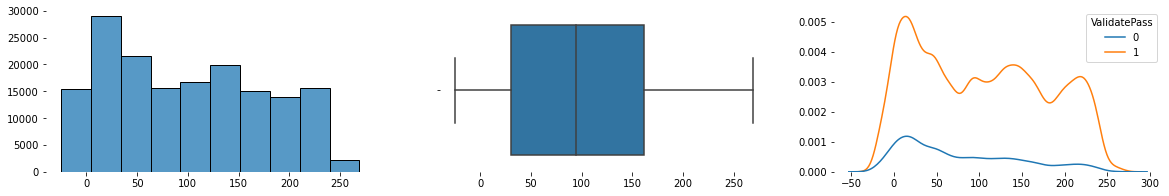

In [65]:
target='ValidatePass'
textlab='# of Student'
textlab_tar='# of Students'

display_unq(df,'date_assignment',target,10,'num','date_assignment',textlab,textlab_tar)

**** Sum Of Clicks ****
***********************



,count,mean,std,min,25%,50%,75%,max
sum_click,165109,3.97,8.27,1,1,2,4,402



**** Visuallations of Feature Sum Of Clicks ****
*************************************************



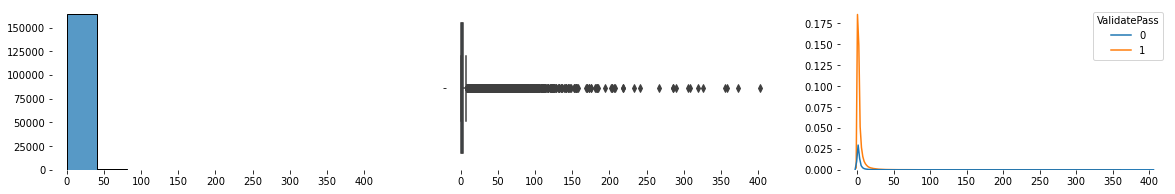

In [66]:
display_unq(df,'sum_click',target,10,'num','Sum of Clicks',textlab,textlab_tar)

**** Weight ****
****************



,count,mean,std,min,25%,50%,75%,max
weight,165109,13.13,18.47,0,0,10,20,100



**** Visuallations of Feature Weight ****
******************************************



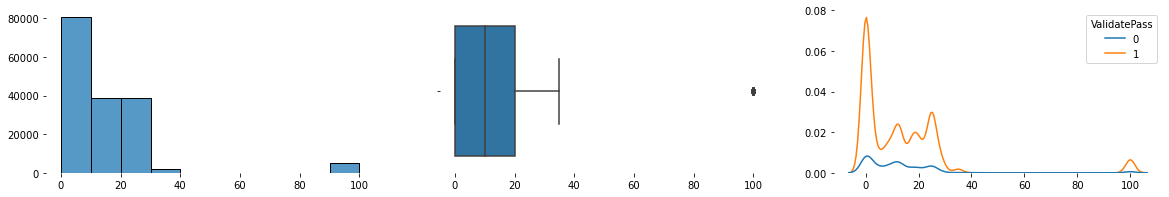

In [67]:
display_unq(df,'weight',target,10,'num','Weight',textlab,textlab_tar)

**** Module_Presentation_Length ****
************************************



,count,mean,std,min,25%,50%,75%,max
module_presentation_length,165109,255.57,13.59,234,240,262,268,269



**** Visuallations of Feature Module_Presentation_Length ****
**************************************************************



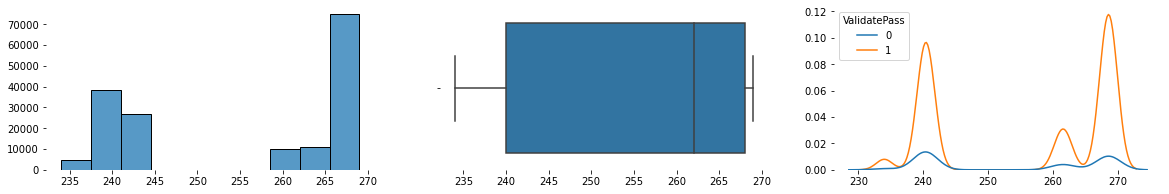

In [68]:
display_unq(df,'module_presentation_length',target,10,'num','module_presentation_length',textlab,textlab_tar)

**** Date_Submitted ****
************************



,count,mean,std,min,25%,50%,75%,max
date_submitted,165109,119.56,71.12,-10,52,119,179,608



**** Visuallations of Feature Date_Submitted ****
**************************************************



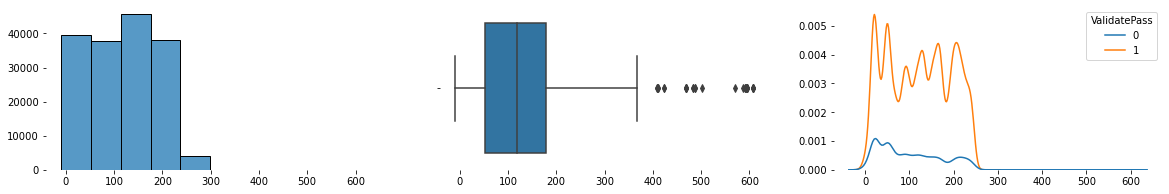

In [69]:
display_unq(df,'date_submitted',target,10,'num','date_submitted',textlab,textlab_tar)

**** Score ****
***************



,count,mean,std,min,25%,50%,75%,max
score,165029,78.88,16.54,0,70,82,91,100



**** Visuallations of Feature Score ****
*****************************************



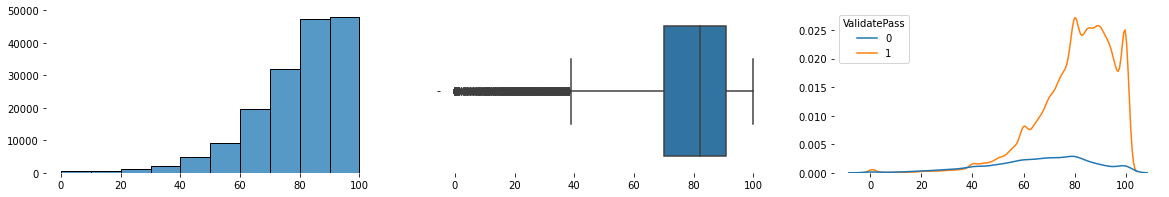

In [70]:
display_unq(df,'score',target,10,'num','score',textlab,textlab_tar)

**** Studied_Credits ****
*************************



,count,mean,std,min,25%,50%,75%,max
studied_credits,165109,78.91,36.5,30,60,60,90,630



**** Visuallations of Feature Studied_Credits ****
***************************************************



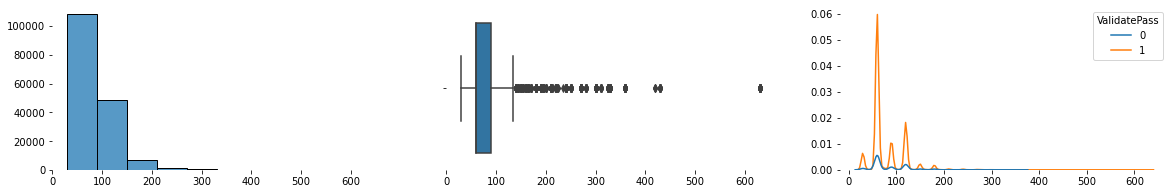

In [71]:
display_unq(df,'studied_credits',target,10,'num','studied_credits',textlab,textlab_tar)

**** Date_Registration ****
***************************



,count,mean,std,min,25%,50%,75%,max
date_registration,165108,-68.51,47.36,-311,-98,-56,-29,124



**** Visuallations of Feature Date_Registration ****
*****************************************************



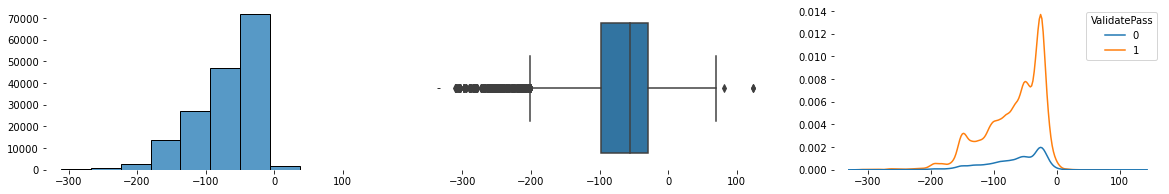

In [72]:
display_unq(df,'date_registration',target,10,'num','date_registration',textlab,textlab_tar)

**** Date_Unregistration ****
*****************************



,count,mean,std,min,25%,50%,75%,max
date_unregistration,6013,156.41,55.37,-166,118,162,206,444



**** Visuallations of Feature Date_Unregistration ****
*******************************************************



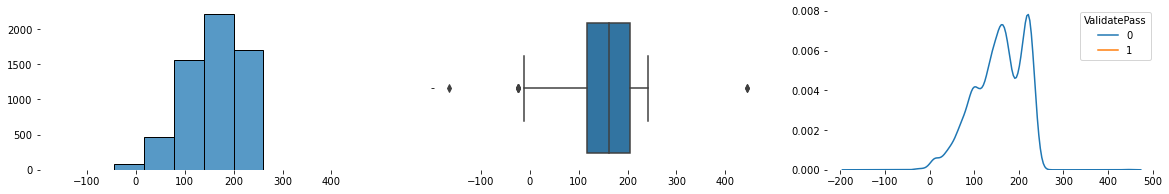

In [73]:
display_unq(df,'date_unregistration',target,10,'num','date_unregistration',textlab,textlab_tar)


**** Visuallations of Feature Num_Of_Prev_Attempts ****
********************************************************



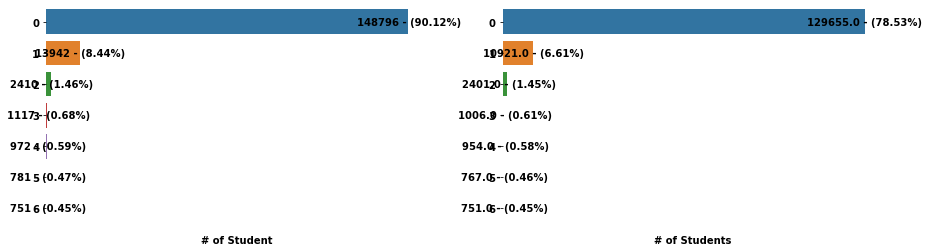

In [74]:
display_unq(df,'num_of_prev_attempts',target,10,'char','num_of_prev_attempts',textlab,textlab_tar)


**** Visuallations of Feature Final_Result ****
************************************************



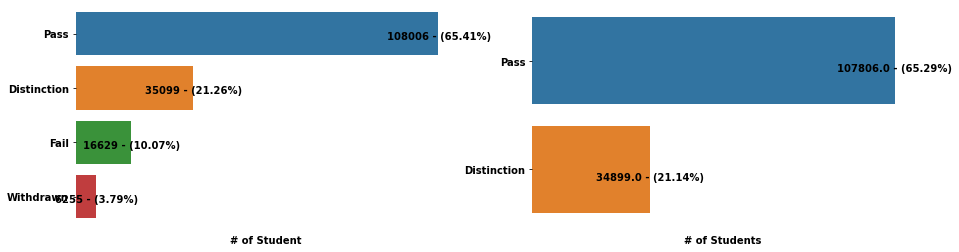

In [75]:
display_unq(df,'final_result',target,10,'char','final_result',textlab,textlab_tar)


**** Visuallations of Feature Code_Module ****
***********************************************



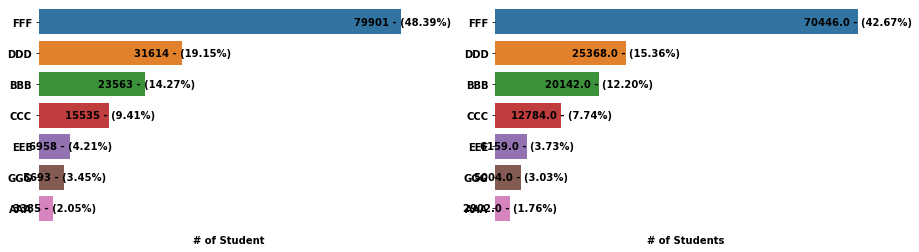

In [76]:
display_unq(df,'code_module',target,10,'char','code_module',textlab,textlab_tar)


**** Visuallations of Feature Code_Presentation ****
*****************************************************



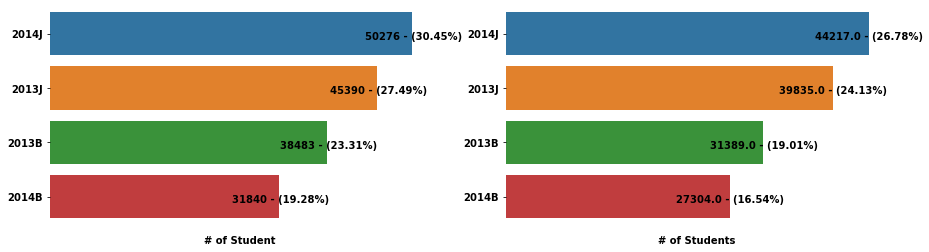

In [77]:
display_unq(df,'code_presentation',target,10,'char','code_presentation',textlab,textlab_tar)


**** Visuallations of Feature Assessment_Type ****
***************************************************



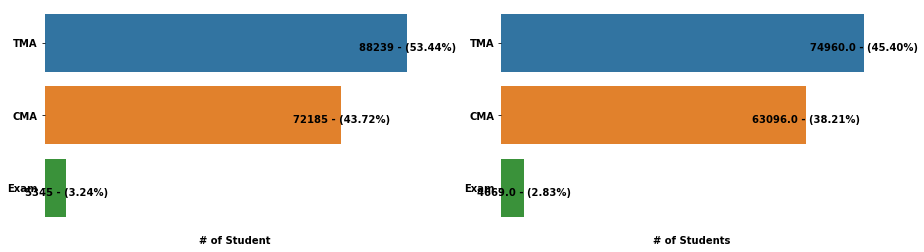

In [78]:
display_unq(df,'assessment_type',target,10,'char','assessment_type',textlab,textlab_tar)


**** Visuallations of Feature Region ****
******************************************



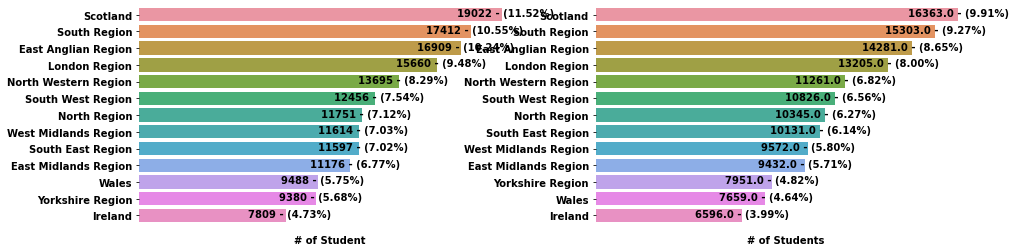

In [79]:
display_unq(df,'region',target,10,'char','region',textlab,textlab_tar)


**** Visuallations of Feature Highest_Education ****
*****************************************************



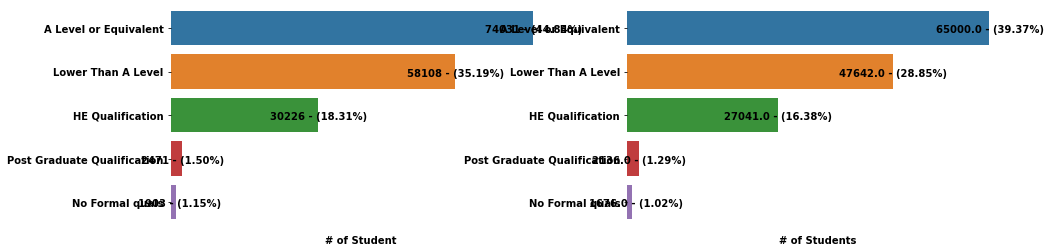

In [80]:
display_unq(df,'highest_education',target,10,'char','highest_education',textlab,textlab_tar)


**** Visuallations of Feature Imd_Band ****
********************************************



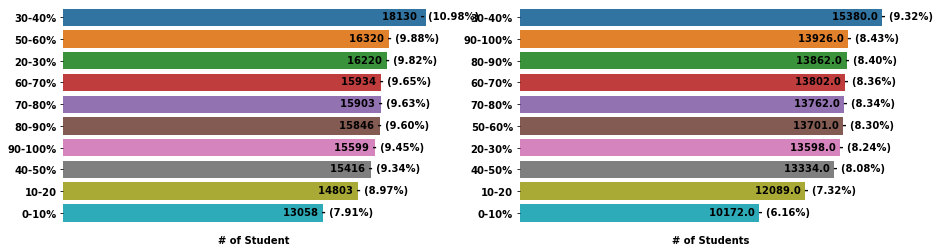

In [81]:
display_unq(df,'imd_band',target,10,'char','imd_band',textlab,textlab_tar)


**** Visuallations of Feature Age_Band ****
********************************************



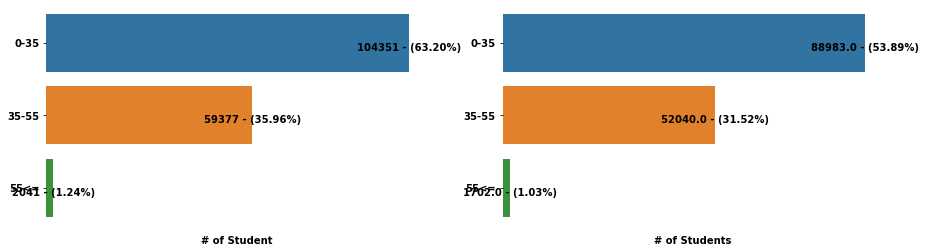

In [82]:
display_unq(df,'age_band',target,10,'char','age_band',textlab,textlab_tar)

In [173]:
df[target].value_counts(normalize=True)

1    0.864066
0    0.135934
Name: ValidatePass, dtype: float64

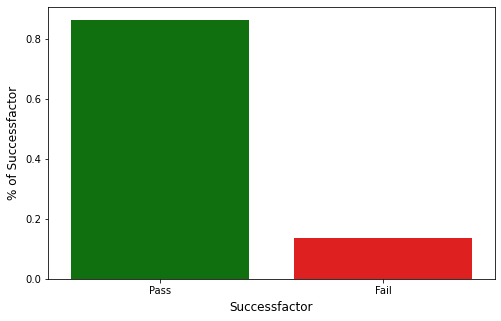

In [174]:
# Visualizing the percentage of canceled vs not canceled bookings: 
plt.figure(figsize=(8,5)) 
sns.barplot(x=df['ValidatePass'].unique(), y=df['ValidatePass'].value_counts(normalize=True), palette=['green', 'red'])
plt.xlabel("Successfactor", fontsize = 12, labelpad = 5)
plt.ylabel("% of Successfactor", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Pass', 'Fail']);

In [175]:
#Define the function to identify the outliers
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [176]:

colout = ['sum_click','date_submitted','score','studied_credits','date_registration']
for column in colout:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])

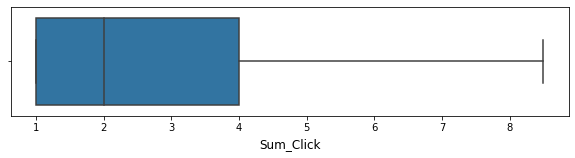

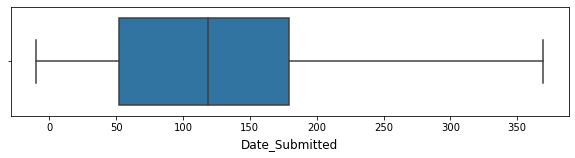

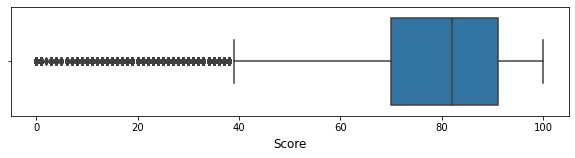

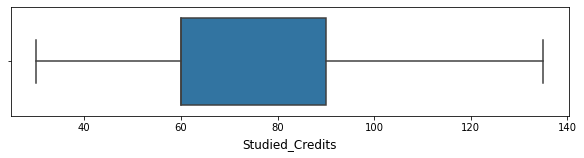

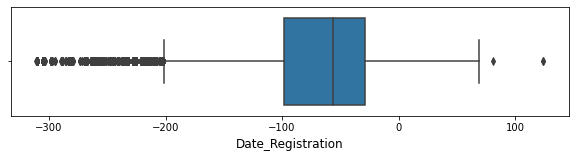

In [177]:
coloutcheck = ['sum_click','date_submitted','score','studied_credits','date_registration']
for i in coloutcheck:
    plt.figure(figsize=(10,2)) 
    sns.boxplot(data=df,x=df[i]) #,x='is_canceled')
    plt.xlabel(i.title(), fontsize = 12, labelpad = 5)

In [188]:
#Check for missing value
print('****Missing Values in the Dataset****')
print('*************************************')
msv = df.isnull().sum()[df.isnull().sum()>0]
if msv.empty:
    print('There is no missing values in the data.') 
else:
    for i in range(msv.count()):
        print('{} Missing values in {} which is {}% of total data'.format(msv[i],msv.index[i],round(((msv[i]/df.shape[0])*100),2)))

****Missing Values in the Dataset****
*************************************
80 Missing values in score which is 0.05% of total data
10080 Missing values in imd_band which is 6.11% of total data
1 Missing values in date_registration which is 0.0% of total data
159096 Missing values in date_unregistration which is 96.36% of total data


In [189]:
df['score']=df['score'].fillna(df['score'].median())
df['date_registration']=df['date_registration'].fillna(df['date_registration'].median())
df['imd_band']=df['imd_band'].fillna(df['imd_band'].mode()[0])
df.drop('date_unregistration',axis=1,inplace=True)

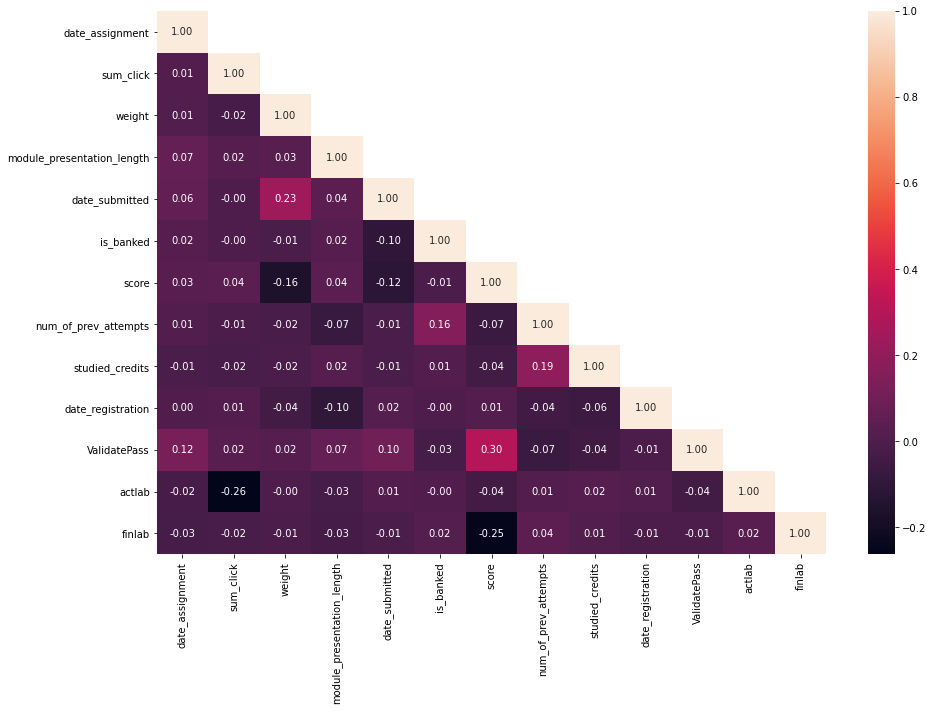

In [190]:
#Heat map - Relationalship analysis
plt.figure(figsize=(15,10))
sns.heatmap(df.drop(['id_student','id_site','id_assessment','W2','W3','W4','KPI'],axis=1).corr(),mask=np.triu(df.drop(['id_student','id_site','id_assessment','W2','W3','W4','KPI'],axis=1).corr(),+1),fmt='.2f',annot=True);

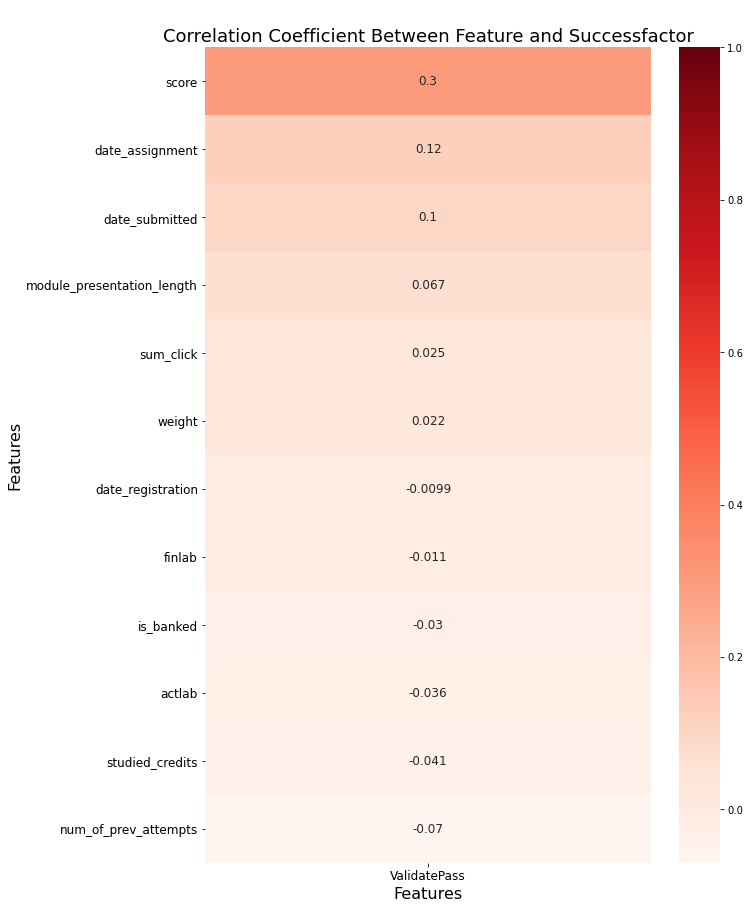

In [191]:
# Visualizing correlation coefficients between features and cancellation:
fig = plt.figure(figsize=(10,15))
ax = sns.heatmap(df.drop(['id_student','id_site','id_assessment','W2','W3','W4','KPI'],axis=1).corr()[[target]].sort_values(target, ascending=False), annot = True, annot_kws = {"size":12}, cmap='Reds')
ax.set_title('Correlation Coefficient Between Feature and Successfactor', fontsize=18)
ax.set_xlabel('Features', fontsize = 16)
ax.set_ylabel('Features', fontsize = 16)
ax.tick_params(axis = "both", labelsize = 12);
y_min, y_max = ax.get_ylim()
ax.set_ylim(top=y_max+1);

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165109 entries, 0 to 165108
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   code_module                 165109 non-null  object 
 1   code_presentation           165109 non-null  object 
 2   id_student                  165109 non-null  int64  
 3   id_site                     165109 non-null  int64  
 4   date_assignment             165109 non-null  int64  
 5   sum_click                   165109 non-null  float64
 6   activity_type               165109 non-null  object 
 7   id_assessment               165109 non-null  int64  
 8   assessment_type             165109 non-null  object 
 9   weight                      165109 non-null  float64
 10  module_presentation_length  165109 non-null  int64  
 11  date_submitted              165109 non-null  float64
 12  is_banked                   165109 non-null  int64  
 13  score         

In [193]:
Modeldf = df.drop(['id_student','id_site','id_assessment','W2','W3','W4','KPI','actlab','finlab'],axis=1)

In [201]:
Modeldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165109 entries, 0 to 165108
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   code_module                 165109 non-null  object 
 1   code_presentation           165109 non-null  object 
 2   date_assignment             165109 non-null  int64  
 3   sum_click                   165109 non-null  float64
 4   activity_type               165109 non-null  object 
 5   assessment_type             165109 non-null  object 
 6   weight                      165109 non-null  float64
 7   module_presentation_length  165109 non-null  int64  
 8   date_submitted              165109 non-null  float64
 9   is_banked                   165109 non-null  int64  
 10  score                       165109 non-null  float64
 11  gender                      165109 non-null  object 
 12  region                      165109 non-null  object 
 13  highest_educat

In [203]:
from sklearn import preprocessing
vars = ['code_module',
'code_presentation',
'activity_type',
'assessment_type',
'region',
'highest_education',
'imd_band',
'age_band',
'final_result']

for i in vars:
    Modeldf[i]= label_encoder.fit_transform(df[i])


In [206]:
Modeldf['gender'] = Modeldf['gender'].map({'M': 1, 'F':0})
Modeldf['disability'] = Modeldf['disability'].map({'Y': 1, 'N':0})

In [207]:
Modeldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165109 entries, 0 to 165108
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   code_module                 165109 non-null  int64  
 1   code_presentation           165109 non-null  int64  
 2   date_assignment             165109 non-null  int64  
 3   sum_click                   165109 non-null  float64
 4   activity_type               165109 non-null  int64  
 5   assessment_type             165109 non-null  int64  
 6   weight                      165109 non-null  float64
 7   module_presentation_length  165109 non-null  int64  
 8   date_submitted              165109 non-null  float64
 9   is_banked                   165109 non-null  int64  
 10  score                       165109 non-null  float64
 11  gender                      165109 non-null  int64  
 12  region                      165109 non-null  int64  
 13  highest_educat

In [209]:
Modeldf.isnull().sum().sum()

0

In [210]:
import pandas as pd;import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, roc_auc_score,roc_curve,accuracy_score, recall_score, confusion_matrix,classification_report, precision_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

from IPython.display import HTML 
from sklearn.metrics import precision_recall_fscore_support as score

In [227]:
def display_dataframe(df):
    numeric_col_mask = df.dtypes.apply(lambda d: issubclass(np.dtype(d).type, np.number))

    # Dict used to center the table headers
    d = dict(selector="th",
        props=[('text-align', 'center')])

    # Style
    display(df.style.set_properties(subset=df.columns[numeric_col_mask], # right-align the numeric columns and set their width
                            **{'width':'5em', 'height':'3em','text-align':'right','border-color': 'white','border-style' :'solid'})\
            .set_properties(subset=df.columns[~numeric_col_mask], # left-align the non-numeric columns and set their width
                            **{'width':'5em', 'text-align':'left'})\
            .format(lambda x: '{:,.0f}'.format(x) if x > 1e3 else '{:,.2f}'.format(x), # format the numeric values
                    subset=pd.IndexSlice[:,df.columns[numeric_col_mask]])\
            .hide_index()\
#            .highlight_max('color: green')\
            .set_table_styles([d])) # center the header

In [214]:
#AUC and ROC Value
def roc_model(model_name,x,y):
    # predict probabilities
    probs = model_name.predict_proba(x)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate AUC
    from sklearn.metrics import roc_auc_score
    auc = roc_auc_score(y, probs)
    fpr, tpr, _ = roc_curve(y, probs)
    return probs,auc,fpr,tpr

In [215]:
def con_mat(y_train,y_predict_train,y_test,y_predict_test):
    fig, axis=plt.subplots(nrows=1,ncols=2)
    fig.set_size_inches(10,4)
    fig.tight_layout()

    cm=confusion_matrix(y_train,y_predict_train,labels=[0, 1])

    df_cm = pd.DataFrame(cm, index = [i for i in ["Not Canceled","Canceled"]],
    columns = [i for i in ["Not Canceled","Canceled"]])
    sns.heatmap(df_cm, annot=True ,fmt='g',ax=axis[0])
    axis[0].title.set_text('Confustion Matrix - Train Data')

    cm=confusion_matrix(y_test,y_predict_test,labels=[0, 1])

    df_cm = pd.DataFrame(cm, index = [i for i in ["Not Canceled","Canceled"]],
    columns = [i for i in ["Not Canceled","Canceled"]])
    sns.heatmap(df_cm, annot=True ,fmt='g',ax=axis[1])
    axis[1].title.set_text('Confustion Matrix - Test Data')

In [216]:
def scores_train_test(model,X_train,X_test,y_train,y_test,y_predict_train,y_predict_test,mname,model_name):
    #model=bgcl
    from IPython.display import HTML 
    from sklearn.metrics import precision_recall_fscore_support as score

    s = [[None for j in range(6)] for i in range(2)]

    print(model_name)
    print('********************************\n')

    #model_name = str(model).split('(')[0]
    s[0][0] = model_name + '_' + mname +'_Train'
    s[1][0] = model_name + '_' + mname +'_Test'
    
    report_train = classification_report(y_train, y_predict_train, output_dict=True)
    report_test = classification_report(y_test, y_predict_test, output_dict=True)

    s[0][1]=round(report_train['1']['precision']*100,2)
    s[1][1]=round(report_test['1']['precision']*100,2)

    s[0][2]=round(report_train['1']['recall']*100,2)
    s[1][2]=round(report_test['1']['recall']*100,2)

    s[0][3]=round(report_train['1']['f1-score']*100,2)
    s[1][3]=round(report_test['1']['f1-score']*100,2)

    s[0][4]=round(report_train['accuracy']*100,2)
    s[1][4]=round(report_test['accuracy']*100,2)

    probs, auc, fpr, tpr = roc_model(model,X_train,y_train)
    probst, auc1, fpr1, tpr1 = roc_model(model,X_test,y_test)

    s[0][5]=round(auc*100,2)
    s[1][5]=round(auc1*100,2)

    df = pd.DataFrame(data=s,columns=['Scores','Precision','Recall','F-Score','Accuracy','AUC'])

    con_mat(y_train,y_predict_train,y_test,y_predict_test)

    plt.figure(figsize=(5,5))

    plt.plot(fpr,tpr, marker='o', label='AUC - Train:' + str(s[0][5]))
    plt.plot(fpr1,tpr1, marker='o', label='AUC - Test:' + str(s[1][5]))

    plt.legend(loc="lower right")
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')

    display_dataframe(df)
    return(df)

In [217]:
def con_mat_r(y_train,y_predict_train,y_test,y_predict_test,nc,he,wi,tit):
    nc = len(y_predict_train)

    fig, axis=plt.subplots(nrows=nc,ncols=2)
    fig.set_size_inches(he,wi)
    fig.tight_layout()

    
    c=0
    for i in y_predict_train:
        cm=confusion_matrix(y_train,i,labels=[0, 1])

        df_cm = pd.DataFrame(cm, index = [i for i in ["Not Canceled","Canceled"]],
        columns = [i for i in ["Not Canceled","Canceled"]])

        sns.heatmap(df_cm, annot=True ,fmt='g',ax=axis[c][0])
        axis[c][0].title.set_text(tit[c] + ' - Train Data')
        c=c+1

    c=0
    for i in y_predict_test:
        cm=confusion_matrix(y_test,i,labels=[0, 1])

        df_cm = pd.DataFrame(cm, index = [i for i in ["Not Canceled","Canceled"]],
        columns = [i for i in ["Not Canceled","Canceled"]])

        sns.heatmap(df_cm, annot=True ,fmt='g',ax=axis[c][1])
        axis[c][1].title.set_text(tit[c] + ' - Test Data')
        c=c+1


### Split the data for training and testing

In [218]:
X = Modeldf.drop('ValidatePass',axis=1)
y = Modeldf['ValidatePass']

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.15,random_state=9)

In [220]:
X_train.shape

(140342, 21)

In [221]:
X_test.shape

(24767, 21)

In [222]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [223]:
sc_train = scaler.fit_transform(X_train)
X_train_sc = pd.DataFrame(sc_train, index=X_train.index, columns=X_train.columns)

In [224]:
sc_test = psc_test = scaler.transform(X_test)
X_test_sc = pd.DataFrame(sc_test, index=X_test.index, columns=X_test.columns)

In [225]:
from sklearn.tree import DecisionTreeClassifier

Decision_Tree
********************************



Scores,Precision,Recall,F-Score,Accuracy,AUC
Decision_Tree_Base_Train,100.00,100.00,100.00,100.00,100.00
Decision_Tree_Base_Test,100.00,100.00,100.00,100.00,100.00


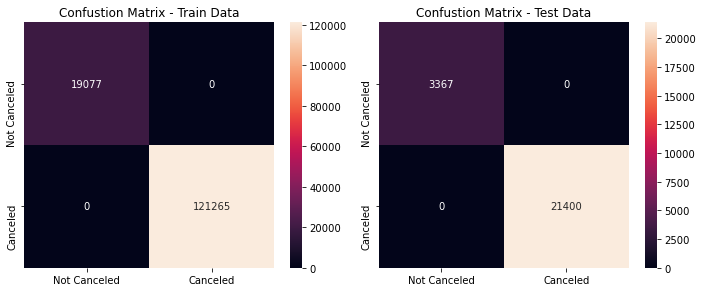

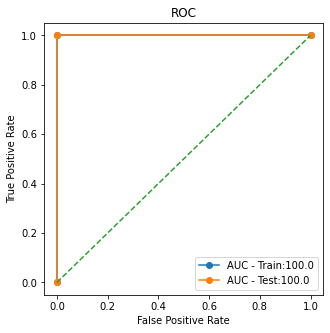

In [228]:
dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X_train_sc,y_train)

dtree_train_predict = dtree.predict(X_train_sc)
dtree_test_predict = dtree.predict(X_test_sc)

res_df = scores_train_test(dtree,X_train_sc,X_test_sc,y_train,y_test,dtree_train_predict,dtree_test_predict,'Base','Decision_Tree')

In [229]:
tempdf=res_df.copy()

In [231]:
# invoke the LinearRegression function
lgr_model = LogisticRegression(random_state=0)
lgr_model.fit(X_train_sc,y_train)

lgr_train=lgr_model.predict(X_train_sc)
lgr_test=lgr_model.predict(X_test_sc)

LogisticRegression
********************************



Scores,Precision,Recall,F-Score,Accuracy,AUC
LogisticRegression_Base_Train,88.02,98.51,92.97,87.13,78.37
LogisticRegression_Base_Test,88.13,98.57,93.06,87.29,78.72


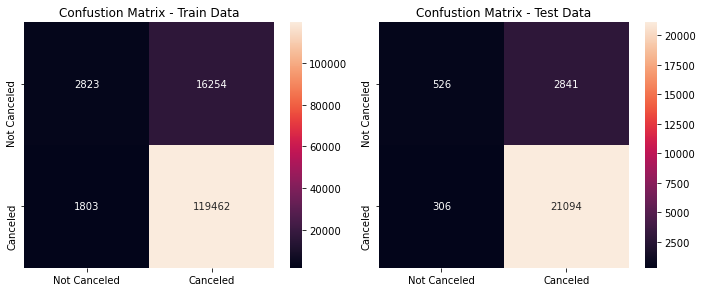

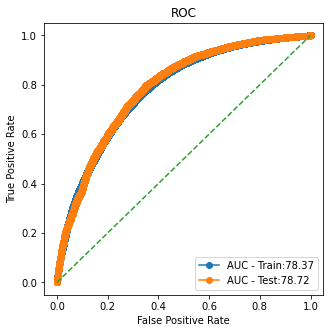

In [232]:
res_df = scores_train_test(lgr_model,X_train_sc,X_test_sc,y_train,y_test,lgr_train,lgr_test,'Base','LogisticRegression')

In [233]:
tempdf = pd.concat([tempdf,res_df])

In [234]:
clf = LinearDiscriminantAnalysis()
lda_model=clf.fit(X_train_sc, y_train)

lda_model_ytrain_predict = lda_model.predict(X_train_sc)
lda_model_ytest_predict = lda_model.predict(X_test_sc)

LDA
********************************



Scores,Precision,Recall,F-Score,Accuracy,AUC
LDA_Base_Train,88.63,97.68,92.93,87.16,78.19
LDA_Base_Test,88.82,97.62,93.01,87.32,78.50


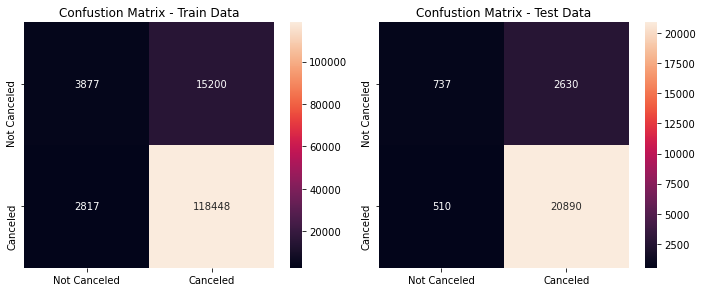

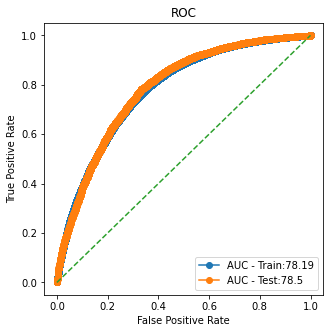

In [235]:
res_df=scores_train_test(clf,X_train_sc,X_test_sc,y_train,y_test,
                         lda_model_ytrain_predict,lda_model_ytest_predict,'Base','LDA')

In [236]:
tempdf = pd.concat([tempdf,res_df])

In [237]:
rfcl = RandomForestClassifier(random_state=0)

rfcl.fit(X_train_sc, y_train)
rf_train = rfcl.predict(X_train_sc)
rf_test = rfcl.predict(X_test_sc)

RandomForest
********************************



Scores,Precision,Recall,F-Score,Accuracy,AUC
RandomForest_Base_Train,100.00,100.00,100.00,100.00,100.00
RandomForest_Base_Test,100.00,100.00,100.00,100.00,100.00


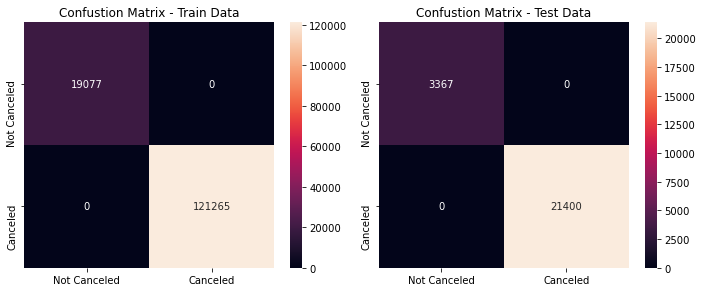

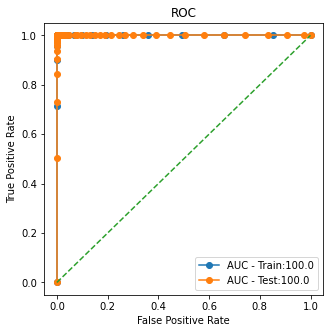

In [238]:
res_df = scores_train_test(rfcl,X_train_sc,X_test_sc,y_train,y_test,rf_train,rf_test,'Base','RandomForest')

In [ ]:
#siva

In [239]:
tempdf = pd.concat([tempdf,res_df])

In [240]:
NB_model = GaussianNB()
NB_model.fit(X_train_sc, y_train)
NB_Model_y_predict_train = NB_model.predict(X_train_sc)
NB_Model_y_predict_test = NB_model.predict(X_test_sc)

GaussianNB
********************************



Scores,Precision,Recall,F-Score,Accuracy,AUC
GaussianNB_Base_Train,88.50,95.28,91.76,85.22,74.57
GaussianNB_Base_Test,88.72,95.27,91.87,85.44,75.07


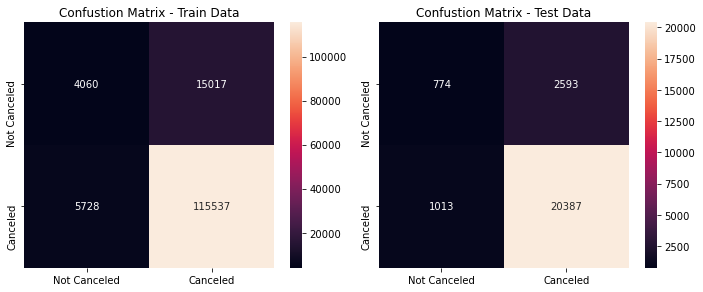

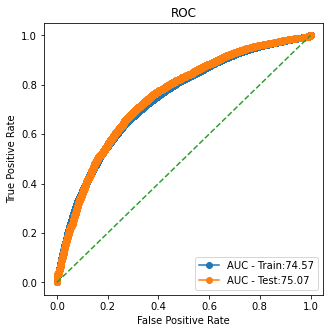

In [241]:
res_df=scores_train_test(NB_model,X_train_sc,X_test_sc,y_train,y_test,NB_Model_y_predict_train,NB_Model_y_predict_test,'Base','GaussianNB')

In [242]:
tempdf = pd.concat([tempdf,res_df])

In [243]:
xgbcl = XGBClassifier(use_label_encoder=True,objective='binary:hinge')
xgbcl.fit(X_train_sc,y_train)

xgtrainpredict = xgbcl.predict(X_train_sc)
xgtestpredict = xgbcl.predict(X_test_sc)

XGBoost
********************************



Scores,Precision,Recall,F-Score,Accuracy,AUC
XGBoost_Base_Train,100.00,100.00,100.00,100.00,100.00
XGBoost_Base_Test,100.00,100.00,100.00,100.00,100.00


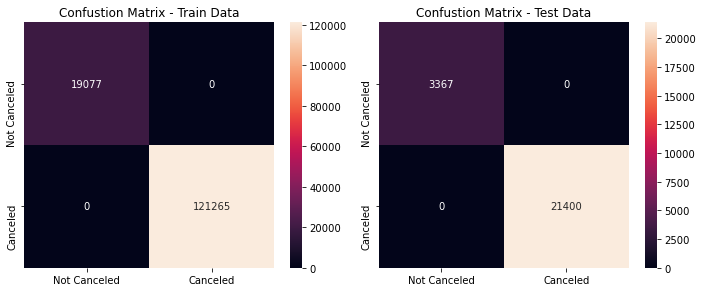

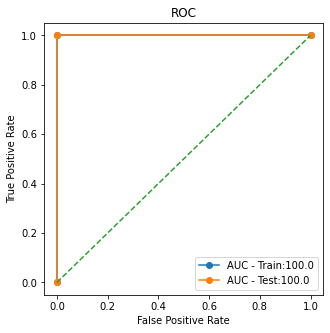

In [244]:
res_df=scores_train_test(xgbcl,X_train_sc,X_test_sc,y_train,y_test,xgtrainpredict,xgtestpredict,'Base','XGBoost')

In [245]:
tempdf = pd.concat([tempdf,res_df])

In [246]:
#Base model with K-Value as 5
KNN_Model = KNeighborsClassifier(n_neighbors=5)
KNN_Model.fit(X_train_sc,y_train)
KNN_train_p = KNN_Model.predict(X_train_sc)
KNN_test_p = KNN_Model.predict(X_test_sc)

KNN
********************************



Scores,Precision,Recall,F-Score,Accuracy,AUC
KNN_Base_Train,95.87,99.73,97.76,96.05,99.35
KNN_Base_Test,93.62,99.44,96.44,93.66,94.32


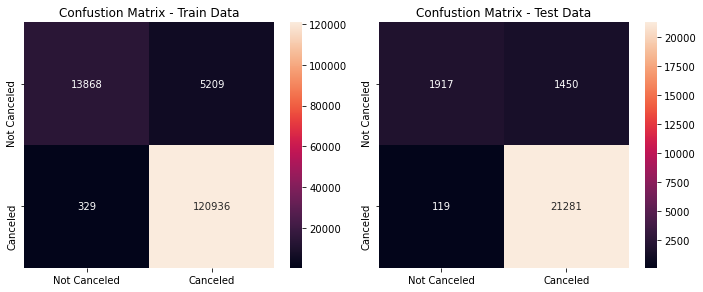

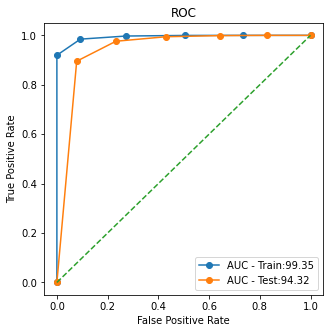

In [247]:
res_df=scores_train_test(KNN_Model,X_train_sc,X_test_sc,y_train,y_test,KNN_train_p,KNN_test_p,'Base','KNN')

In [248]:
tempdf = pd.concat([tempdf,res_df])

ANN
********************************



Scores,Precision,Recall,F-Score,Accuracy,AUC
ANN_Base_Train,100.00,100.00,100.00,100.00,100.00
ANN_Base_Test,100.00,100.00,100.00,100.00,100.00


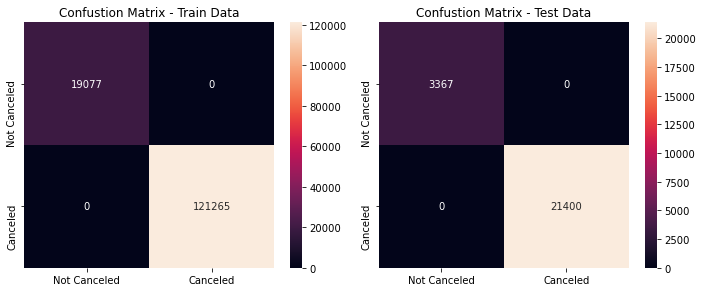

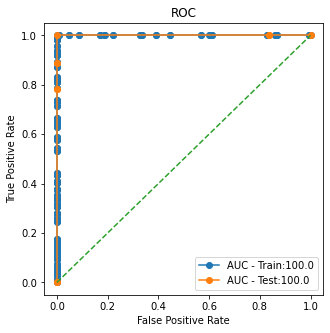

In [249]:
from sklearn.neural_network import MLPClassifier
NNModel = MLPClassifier(random_state=0)
NNModel.fit(X_train_sc,y_train)

NNTrainPredict = NNModel.predict(X_train_sc)
NNTestPredict = NNModel.predict(X_test_sc)
res_df=scores_train_test(NNModel,X_train_sc,X_test_sc,y_train,y_test,NNTrainPredict,NNTestPredict,'Base','ANN')
tempdf = pd.concat([tempdf,res_df])

In [250]:
def report_gen(tt,bagboost):
    tt = tt.reset_index().drop('index',axis=1)
    tt['Model']=tt['Scores'].str.split('_',n=1,expand=True)[0]
    tt['TT']=tt['Scores'].str.split('_',n=1,expand=True)[1].str.split('_',n=1,expand=True)[0]
    tt['BT']=tt['Scores'].str.split('_',n=1,expand=True)[1].str.split('_',n=1,expand=True)[1]
    tt.drop('Scores',axis=1,inplace=True)
    tt = tt[['Model','BT','TT','Precision','Recall','F-Score','Accuracy','AUC']]
    tt_report = tt[((tt['TT']!='Bagging') & (tt['TT']!='Boost'))]

    trg = tt_report.groupby(['Model','TT','BT'])['Precision','Recall','F-Score','Accuracy','AUC'].max().sort_values(by=['Model','TT','BT'],ascending=False)

    metdf = ((trg.T).reset_index()).rename(columns={'index': 'Model'})
    display_dataframe(metdf)

    if (bagboost == True):
        tt_bag = tt[(tt['TT']=='Bagging')]
        tt_boost = tt[(tt['TT']=='Boost')]
        trg_bag = tt_bag.groupby(['Model','TT','BT'])['Precision','Recall','F-Score','Accuracy','AUC'].max().sort_values(by=['Model','TT','BT'],ascending=False)
        trg_boost = tt_boost.groupby(['Model','TT','BT'])['Precision','Recall','F-Score','Accuracy','AUC'].max().sort_values(by=['Model','TT','BT'],ascending=False)
        metdf_bag = ((trg_bag.T).reset_index()).rename(columns={'index': 'Model'})
        metdf_boost = ((trg_boost.T).reset_index()).rename(columns={'index': 'Model'})
        display_dataframe(metdf_bag)
        display_dataframe(metdf_boost)

In [251]:
report_gen(tempdf,False)

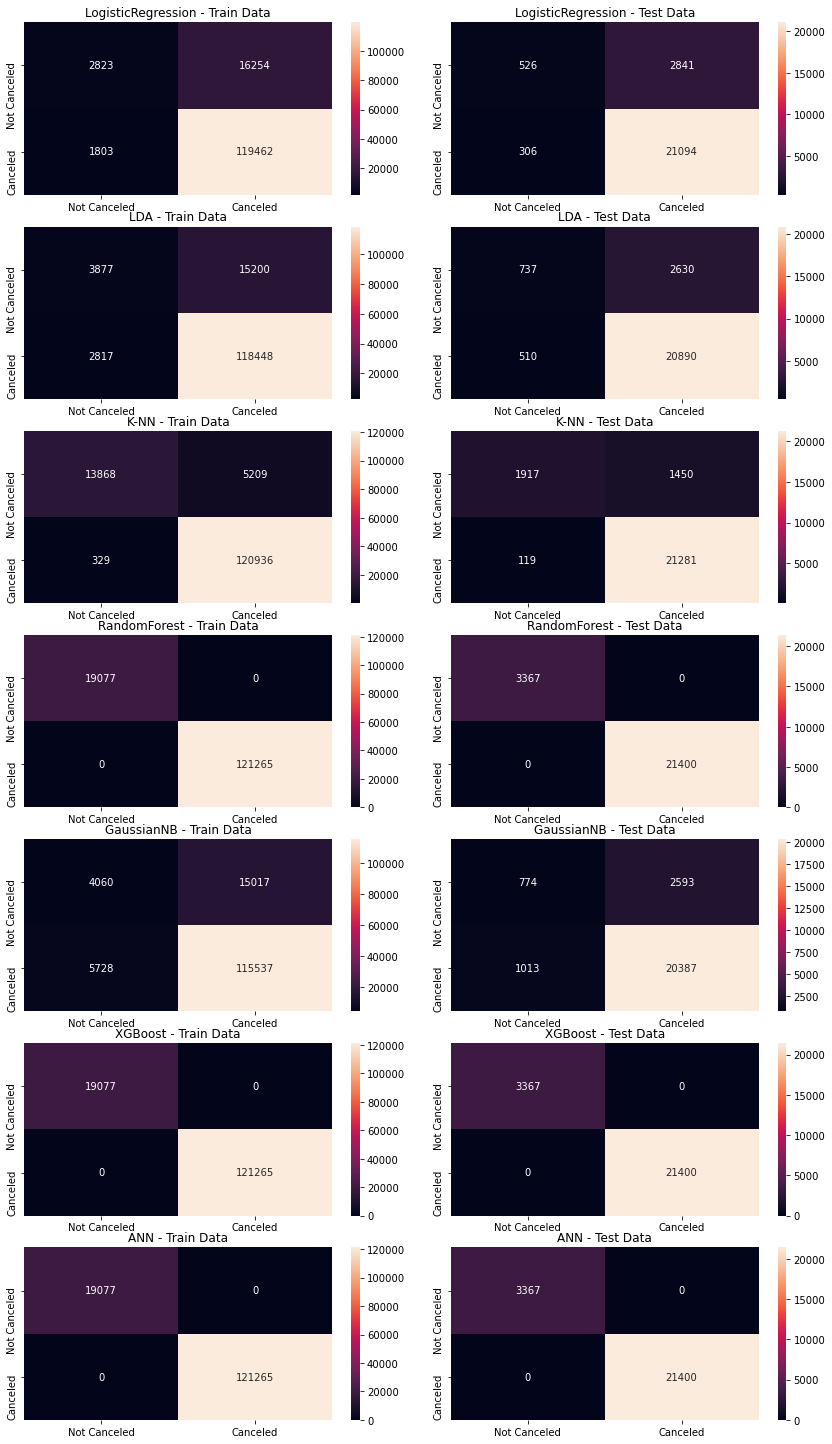

In [253]:
train_preds = [lgr_train,lda_model_ytrain_predict,KNN_train_p,rf_train,NB_Model_y_predict_train,xgtrainpredict,NNTrainPredict]

test_preds = [lgr_test,lda_model_ytest_predict,KNN_test_p,rf_test,NB_Model_y_predict_test,xgtestpredict,NNTestPredict]

mnames = ['LogisticRegression','LDA','K-NN','RandomForest','GaussianNB','XGBoost','ANN']

con_mat_r(y_train,train_preds,y_test,test_preds,2,12,20,mnames)

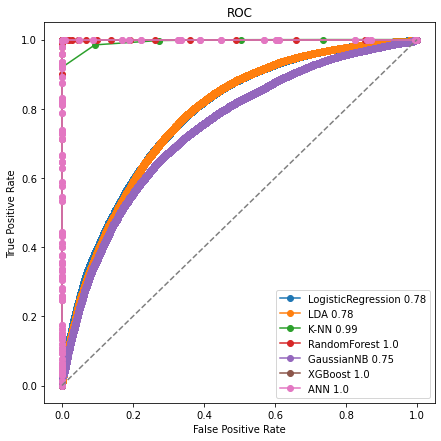

In [254]:
models=[lgr_model,lda_model,KNN_Model,rfcl,NB_model,xgbcl,NNModel]
plt.figure(figsize=(7,7))

c=0
for m in models:
    tprobs, tauc, tfpr, ttpr = roc_model(m,X_train_sc,y_train)
    plt.plot(tfpr,ttpr, marker='o', label=mnames[c] + ' ' + str(round(tauc,2)))
    
    c=c+1

plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')

plt.show()

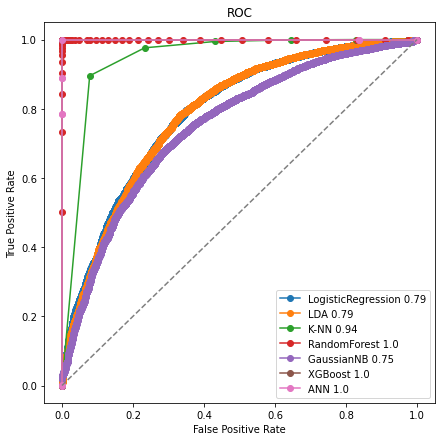

In [255]:
plt.figure(figsize=(7,7))
c=0
for m in models:
    tprobs, tauc, tfpr, ttpr = roc_model(m,X_test_sc,y_test)
    plt.plot(tfpr,ttpr, marker='o', label=mnames[c] + ' ' + str(round(tauc,2)))
    
    c=c+1

plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')

plt.show()

#### Model Tuning - Decsion Tree

In [256]:
def dtrun(x_train,train_labels,x_test,crea,max_dep,min_sam,max_f):
    param_grid = {
        'criterion': crea,
        'max_depth': max_dep,
        'min_samples_leaf': min_sam,
        'min_samples_split': min_sam*3,
        'max_features' : max_f
    }


    dtcl = DecisionTreeClassifier(random_state=0)

    grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 3,scoring='accuracy')
    grid_search.fit(x_train, train_labels)
    print(grid_search.best_params_)
    dtree = grid_search.best_estimator_

    dtp_train=dtree.predict(x_train)
    dtp_test=dtree.predict(x_test)
    return(dtree,dtp_train,dtp_test)

In [257]:
dtree,dtree_train_predict,dtree_test_predict = dtrun(X_train_sc,y_train,X_test_sc,['gini'],[27,36],[3,6],[16,18,21])

{'criterion': 'gini', 'max_depth': 27, 'max_features': 16, 'min_samples_leaf': 3, 'min_samples_split': 3}


Decision_Tree
********************************



Scores,Precision,Recall,F-Score,Accuracy,AUC
Decision_Tree_Tuned_Train,100.00,100.00,100.00,100.00,100.00
Decision_Tree_Tuned_Test,100.00,100.00,100.00,100.00,100.00


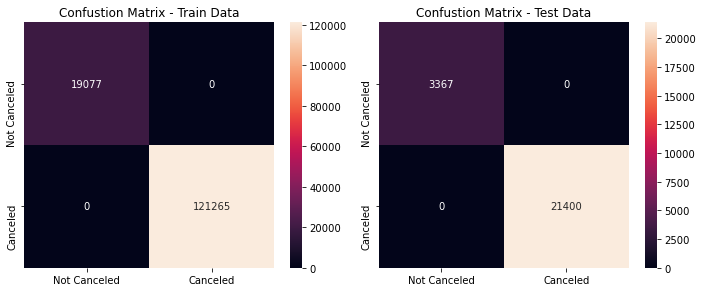

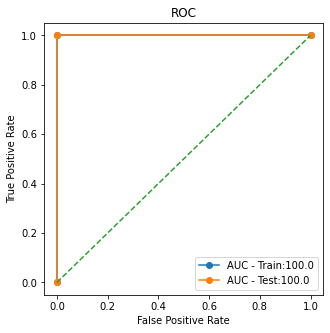

In [258]:
res_df = scores_train_test(dtree,X_train_sc,X_test_sc,y_train,y_test,dtree_train_predict,dtree_test_predict,'Tuned','Decision_Tree')

In [259]:
tempdf = pd.concat([tempdf,res_df])

#### Model Tuning - Logistic Regression

In [260]:
#Logistic Regression with GridSearc CV
def lgrun(x_train,train_labels,x_test,tol,max_iter,n_jobs,sol,C,penality,sco):
    param_grid = {
        'penalty': penality,
        'C':C,
        'max_iter':max_iter,
        'solver':sol,
        'n_jobs':n_jobs,
        'tol':tol
    },


    clf = LogisticRegression(random_state=0)

    grid_clf_acc = GridSearchCV(clf, param_grid = param_grid,scoring = sco,cv=3)
    grid_clf_acc.fit(x_train, train_labels)
    lgr_model=grid_clf_acc.best_estimator_
    print(grid_clf_acc.best_params_)    
    lgr_model
    lgr_train=lgr_model.predict(x_train)
    lgr_test=lgr_model.predict(x_test)

    return(lgr_model,lgr_train,lgr_test)

In [261]:
penalty=['none','11','l2',]
solver=['newton-cg','liblinear']#,,'lbfgs','sag','liblinear','saga']
tol=[0.01,0.001]
C =[0.1,0.01]
maxit = [2000]
njobs = [8,9]

lgr_model,lgr_train,lgr_test = lgrun(X_train_sc,y_train,X_test_sc,tol,maxit,njobs,solver,C,penalty,'accuracy')

{'C': 0.1, 'max_iter': 2000, 'n_jobs': 8, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.01}


LogisticRegression
********************************



Scores,Precision,Recall,F-Score,Accuracy,AUC
LogisticRegression_Tuned_Train,88.02,98.52,92.97,87.13,78.37
LogisticRegression_Tuned_Test,88.13,98.57,93.06,87.30,78.72


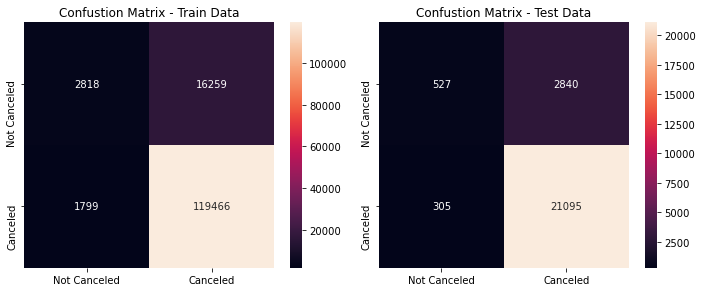

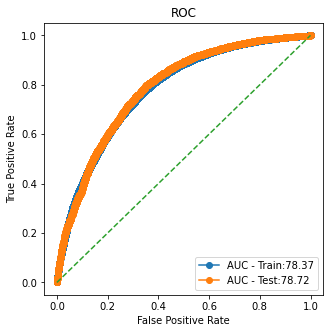

In [262]:
res_df = scores_train_test(lgr_model,X_train_sc,X_test_sc,y_train,y_test,lgr_train,lgr_test,'Tuned','LogisticRegression')

In [263]:
tempdf = pd.concat([tempdf,res_df])

Model Tuning - LinearDiscriminantAnalysis

In [264]:
#LDA with GridSearc CV
def ldarun(x_train,train_labels,x_test,tol,sol,sco):
    param_grid = {
        'solver':sol,
        'tol':tol,
        'n_components':[1,2]
    },
    
    clf = LinearDiscriminantAnalysis()

    grid_clf_acc = GridSearchCV(clf, param_grid = param_grid, cv=3,
                      scoring=sco,n_jobs=1 ,verbose =0)
                                
    grid_clf_acc.fit(x_train, train_labels)
    lda_model=grid_clf_acc.best_estimator_
    print(grid_clf_acc.best_params_)    
    lda_train=lgr_model.predict(x_train)
    lda_test=lgr_model.predict(x_test)
    return(lda_model,lda_train,lda_test)

In [265]:
solver=['svd','eigen']
tol=[0.01,0.01,0.00001]

lda_model,lda_model_ytrain_predict,lda_model_ytest_predict = ldarun(X_train_sc,y_train,X_test_sc,tol,solver,'accuracy')

{'n_components': 1, 'solver': 'svd', 'tol': 0.01}


LDA
********************************



Scores,Precision,Recall,F-Score,Accuracy,AUC
LDA_Tuned_Train,88.02,98.52,92.97,87.13,78.19
LDA_Tuned_Test,88.13,98.57,93.06,87.30,78.50


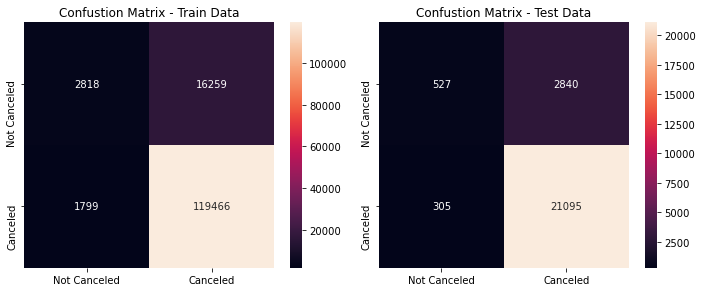

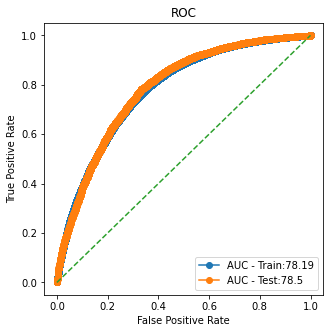

In [266]:
res_df=scores_train_test(clf,X_train_sc,X_test_sc,y_train,y_test,lda_model_ytrain_predict,lda_model_ytest_predict,'Tuned','LDA')

In [267]:
tempdf = pd.concat([tempdf,res_df])

Model Tuning - Random Forest

In [268]:
def rfrun(x_train,train_labels,x_test,max_f,no_est,max_dep,min_sam,min_spl):
    param_grid = {
        'criterion': ['gini'],
        'max_depth': max_dep, #,7,9],
        'max_features':max_f, #,32],
        'min_samples_leaf': min_sam,#15,20],
        'min_samples_split': min_spl,#75,60],
        'n_estimators': no_est
    }

    rfcl = RandomForestClassifier(random_state=0)

    grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 4,scoring='accuracy')
    grid_search.fit(x_train, train_labels)
    print(grid_search.best_params_)
    
    rfcl = grid_search.best_estimator_
    rfcl

    rf_train = rfcl.predict(x_train)
    rf_test = rfcl.predict(x_test)
    return(rfcl,rf_train,rf_test)   

In [269]:
from datetime import datetime
now = datetime.now()

b_current_time = datetime.now().strftime("%H:%M:%S")
print("Current Time =", b_current_time)

Current Time = 15:00:16


In [270]:
rfcl,rfcl_y_predict_train,rfcl_y_predict_test = rfrun(X_train_sc,y_train,X_test_sc,[18,19],[50,60],[22,23],[3],[6])

#rfcl = RandomForestClassifier(random_state=0,max_features=19,max_depth=22,n_estimators=50,min_samples_leaf=3,min_samples_split=6)
# rfcl.fit(X_train_sc,y_train)

# rfcl_y_predict_train = rfcl.predict(X_train_sc)
# rfcl_y_predict_test = rfcl.predict(X_test_sc)

#res_df = scores_train_test(rfcl,X_train_sc,X_test_sc,y_train,y_test,rfcl_y_predict_train,rfcl_y_predict_test,'Tuned','RandomForest')

{'criterion': 'gini', 'max_depth': 22, 'max_features': 18, 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 50}


In [271]:
a_now = datetime.now()

a_current_time = a_now - now
print("Time Taken =", a_current_time)

Time Taken = 0:01:50.840321


RandomForest
********************************



Scores,Precision,Recall,F-Score,Accuracy,AUC
RandomForest_Tuned_Train,100.00,100.00,100.00,100.00,100.00
RandomForest_Tuned_Test,100.00,100.00,100.00,100.00,100.00


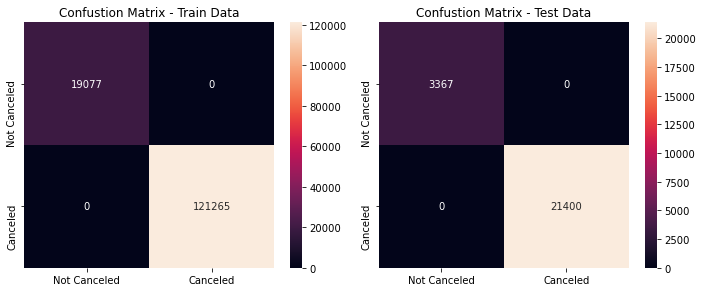

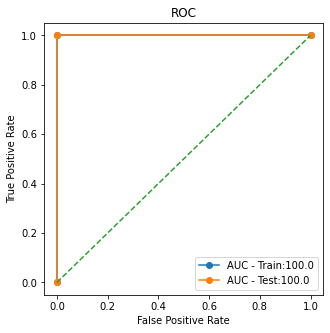

In [272]:
res_df = scores_train_test(rfcl,X_train_sc,X_test_sc,y_train,y_test,rfcl_y_predict_train,rfcl_y_predict_test,'Tuned','RandomForest')

In [273]:
tempdf = pd.concat([tempdf,res_df])

Model Tuning - XGBoost

In [274]:
now = datetime.now()

b_current_time = datetime.now().strftime("%H:%M:%S")
print("Current Time =", b_current_time)

Current Time = 15:02:07


In [275]:
xgbcl = XGBClassifier()
param_grid = {
     'n_estimators': [18],
     'colsample_bytree': [0.7],
     'max_depth': [19],
     'reg_alpha': [1.9],
     'min_child_weight': [2.5],
     'gamma': [4.2],
     'subsample': [0.9],
     'objective':['binary:hinge']
}
xgbcl = GridSearchCV(xgbcl, 
                    param_grid = param_grid, 
                    scoring = "accuracy", 
                    cv = 3)
xgbcl.fit(X_train_sc,y_train)
xgbcl.best_estimator_
# Dictionary of best parameters

# xgtrainpredict = xgbcl.predict(X_train_sc)
# xgtestpredict = xgbcl.predict(X_test_sc)

# res_df=scores_train_test(xgbcl,X_train_sc,X_test_sc,y_train,y_test,xgtrainpredict,xgtestpredict,'Tuned','XGBoost')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=4.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=19,
              min_child_weight=2.5, missing=nan, monotone_constraints='()',
              n_estimators=18, n_jobs=1, num_parallel_tree=1,
              objective='binary:hinge', random_state=0, reg_alpha=1.9,
              reg_lambda=1, scale_pos_weight=None, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [276]:
a_now = datetime.now()

a_current_time = a_now - now
print("Time Taken =", a_current_time)

Time Taken = 0:00:04.685016


In [277]:
xgtrainpredict = xgbcl.predict(X_train_sc)
xgtestpredict = xgbcl.predict(X_test_sc)

XGBoost
********************************



Scores,Precision,Recall,F-Score,Accuracy,AUC
XGBoost_Tuned_Train,100.00,100.00,100.00,100.00,100.00
XGBoost_Tuned_Test,100.00,100.00,100.00,100.00,100.00


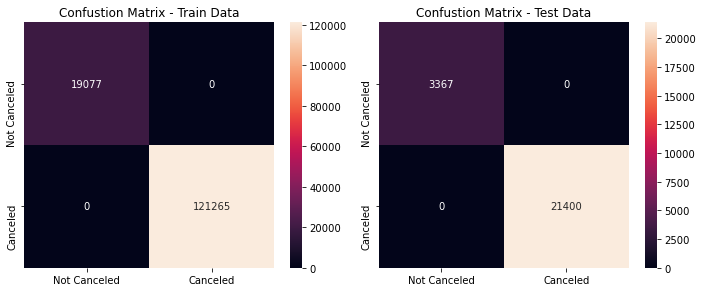

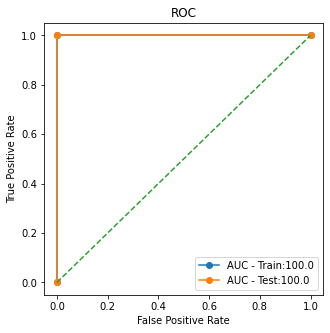

In [278]:
res_df=scores_train_test(xgbcl,X_train_sc,X_test_sc,y_train,y_test,xgtrainpredict,xgtestpredict,'Tuned','XGBoost')

In [279]:
tempdf = pd.concat([tempdf,res_df])

Model Tuning - Neural Networks

In [280]:
from datetime import datetime
now = datetime.now()

b_current_time = datetime.now().strftime("%H:%M:%S")
print("Current Time =", b_current_time)

Current Time = 15:02:13


In [281]:
param_grid = {
    'hidden_layer_sizes': [200,350],
    'max_iter': [500,750],
    'solver': ['sgd','adam'],
    'tol': [0.01,0.001],
}

nncl = MLPClassifier(random_state=9)

NNModel = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 3)

NNModel.fit(X_train_sc, y_train)

NNModel.best_estimator_

MLPClassifier(hidden_layer_sizes=200, max_iter=500, random_state=9, tol=0.01)

In [282]:
a_now = datetime.now()

a_current_time = a_now - now
print("Time Taken =", a_current_time)

Time Taken = 0:23:06.850880


In [283]:
NNTrainPredict = NNModel.predict(X_train_sc)
NNTestPredict = NNModel.predict(X_test_sc)

ANN
********************************



Scores,Precision,Recall,F-Score,Accuracy,AUC
ANN_Tuned_Train,100.00,100.00,100.00,100.00,100.00
ANN_Tuned_Test,100.00,100.00,100.00,100.00,100.00


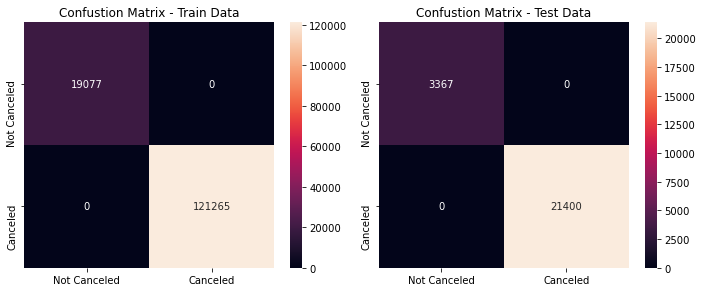

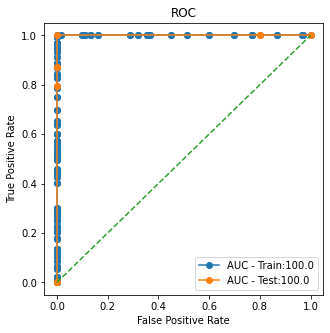

In [284]:
res_df=scores_train_test(NNModel,X_train_sc,X_test_sc,y_train,y_test,NNTrainPredict,NNTestPredict,'Tuned','ANN')

In [285]:
tempdf = pd.concat([tempdf,res_df])

Model Tuning - K-NN

In [286]:
now = datetime.now()

b_current_time = datetime.now().strftime("%H:%M:%S")
print("Current Time =", b_current_time)

Current Time = 15:25:21


In [287]:
acc=[]
for i in range(3,15,3):
    KNN_Model = KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    KNN_Model.fit(X_train_sc,y_train)

    y_test_p = KNN_Model.predict(X_test_sc)
    score_knn = KNN_Model.score(X_test_sc,y_test)
    print(f'Accuracy Score for K={i} : ',score_knn)
    acc.append(score_knn)
    
MCE = [1 - x for x in acc]
MCE    

Accuracy Score for K=3 :  0.9458553720676707
Accuracy Score for K=6 :  0.9411313441272661
Accuracy Score for K=9 :  0.9217507166794525
Accuracy Score for K=12 :  0.9221948560584649


[0.054144627932329326,
 0.05886865587273393,
 0.07824928332054748,
 0.07780514394153515]

In [288]:
a_now = datetime.now()

a_current_time = a_now - now
print("Time Taken =", a_current_time)

Time Taken = 0:07:11.234823


Text(0, 0.5, 'Misclassification Error')

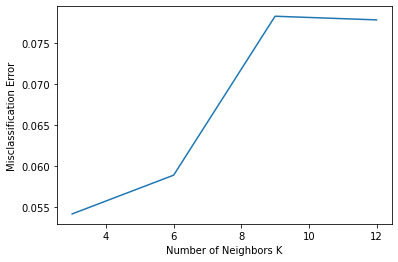

In [289]:
import matplotlib.pyplot as plt
plt.plot(range(3,15,3),MCE)

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')

In [290]:
now = datetime.now()

b_current_time = datetime.now().strftime("%H:%M:%S")
print("Current Time =", b_current_time)

Current Time = 15:32:32


In [291]:
k=9
KNN_Model = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
KNN_Model.fit(X_train_sc,y_train)
KNN_train_p = KNN_Model.predict(X_train_sc)
KNN_test_p = KNN_Model.predict(X_test_sc)
print(f'Accuracy Score for K={k} : ',KNN_Model.score(X_test_sc,y_test))

Accuracy Score for K=9 :  0.9217507166794525


In [292]:
a_now = datetime.now()

a_current_time = a_now - now
print("Time Taken =", a_current_time)

Time Taken = 0:06:01.631910


KNN
********************************



Scores,Precision,Recall,F-Score,Accuracy,AUC
KNN_Tuned_Train,93.64,99.75,96.60,93.93,98.79
KNN_Tuned_Test,91.97,99.64,95.65,92.18,95.34


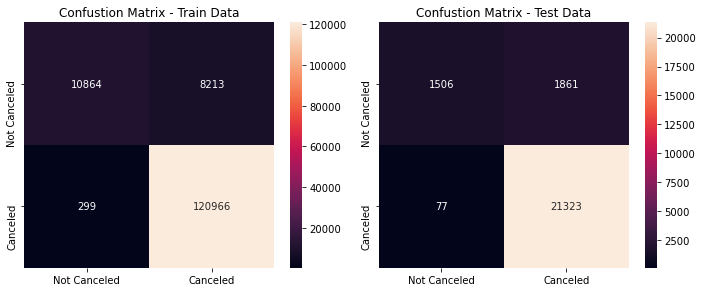

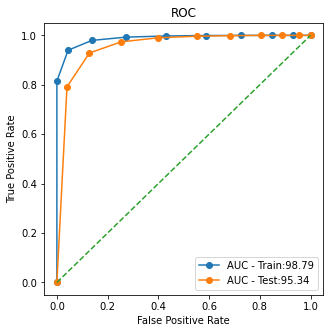

In [293]:
#KNN Model Scores
res_df=scores_train_test(KNN_Model,X_train_sc,X_test_sc,y_train,y_test,KNN_train_p,KNN_test_p,'Tuned','KNN')

In [294]:
tempdf = pd.concat([tempdf,res_df])

Model Tuning - GaussianNB

In [295]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
NB_model = GridSearchCV(estimator=NB_model, 
                 param_grid=params_NB, 
                 cv=5,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
NB_model.fit(X_train_sc, y_train)

NB_model.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'var_smoothing': 0.8111308307896871}

In [296]:
NB_Model_y_predict_train = NB_model.predict(X_train_sc)
NB_Model_y_predict_test = NB_model.predict(X_test_sc)

GaussianNB
********************************



Scores,Precision,Recall,F-Score,Accuracy,AUC
GaussianNB_Tuned_Train,87.09,98.66,92.52,86.21,75.99
GaussianNB_Tuned_Test,87.12,98.60,92.51,86.20,76.57


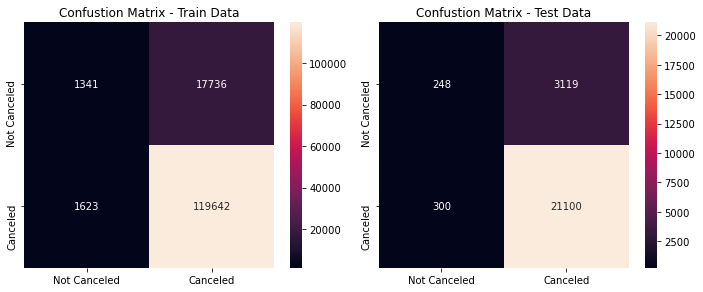

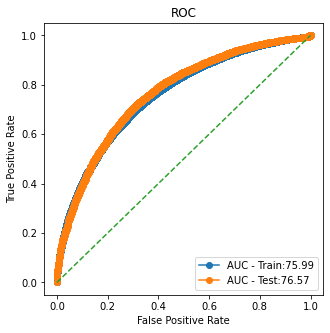

In [297]:
res_df=scores_train_test(NB_model,X_train_sc,X_test_sc,y_train,y_test,NB_Model_y_predict_train,NB_Model_y_predict_test,'Tuned','GaussianNB')

In [298]:
tempdf = pd.concat([tempdf,res_df])

In [299]:
now = datetime.now()

b_current_time = datetime.now().strftime("%H:%M:%S")
print("Current Time =", b_current_time)

Current Time = 15:44:04


Bagging Classifer

In [300]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(base_estimator=rfcl, n_estimators=50,random_state=0)

bgcl = bgcl.fit(X_train_sc, y_train)

bgcl_y_predict_train = bgcl.predict(X_train_sc)
bgcl_y_predict_test = bgcl.predict(X_test_sc)

In [301]:
a_now = datetime.now()

a_current_time = a_now - now
print("Time Taken =", a_current_time)

Time Taken = 0:02:27.900790


BaggingClassifier
********************************



Scores,Precision,Recall,F-Score,Accuracy,AUC
BaggingClassifier_Bagging_Train,100.00,100.00,100.00,100.00,100.00
BaggingClassifier_Bagging_Test,100.00,100.00,100.00,100.00,100.00


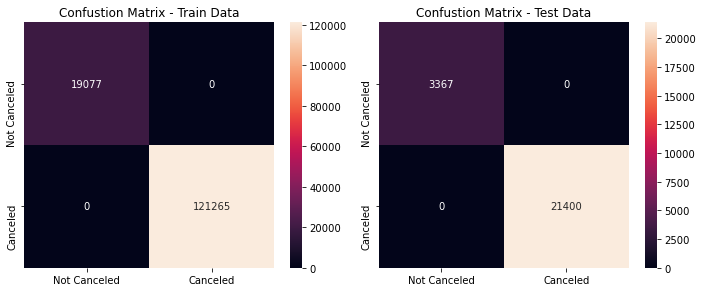

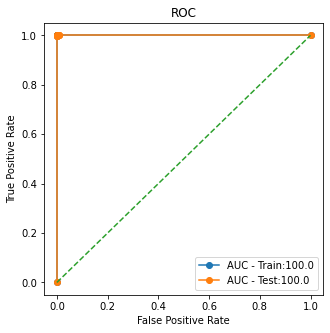

In [302]:
res_df = scores_train_test(bgcl,X_train_sc,X_test_sc,y_train,y_test,bgcl_y_predict_train,bgcl_y_predict_test,'Bagging','BaggingClassifier')

In [303]:
tempdf = pd.concat([tempdf,res_df])

AdaBoosting

In [304]:
now = datetime.now()

b_current_time = datetime.now().strftime("%H:%M:%S")
print("Current Time =", b_current_time)

Current Time = 15:46:43


In [305]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=150, random_state=9)

abcl = abcl.fit(X_train_sc, y_train)
abcl_y_predict_train = abcl.predict(X_train_sc)
abcl_y_predict_test = abcl.predict(X_test_sc)

In [306]:
a_now = datetime.now()

a_current_time = a_now - now
print("Time Taken =", a_current_time)

Time Taken = 0:00:12.034986


AdaBoostClassifier
********************************



Scores,Precision,Recall,F-Score,Accuracy,AUC
AdaBoostClassifier_Boost_Train,100.00,100.00,100.00,100.00,100.00
AdaBoostClassifier_Boost_Test,100.00,100.00,100.00,100.00,100.00


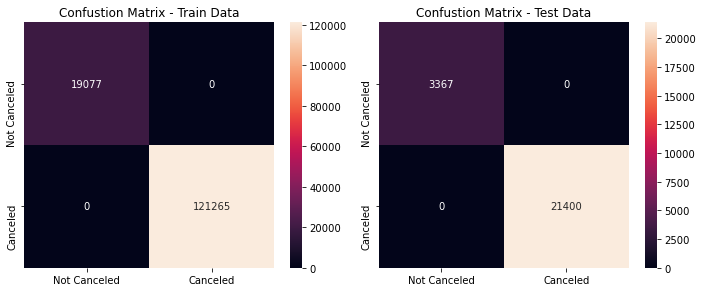

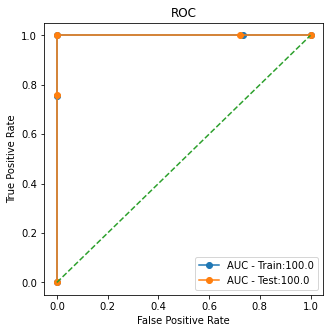

In [307]:
res_df = scores_train_test(abcl,X_train_sc,X_test_sc,y_train,y_test,abcl_y_predict_train,abcl_y_predict_test,'Boost','AdaBoostClassifier')

In [308]:
tempdf = pd.concat([tempdf,res_df])

GradientBoosting

In [309]:
now = datetime.now()

b_current_time = datetime.now().strftime("%H:%M:%S")
print("Current Time =", b_current_time)

Current Time = 15:46:58


In [310]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=0)
gbcl = gbcl.fit(X_train_sc, y_train)

gbcl_y_predict_train = gbcl.predict(X_train_sc)
gbcl_y_predict_test = gbcl.predict(X_test_sc)

In [311]:
a_now = datetime.now()

a_current_time = a_now - now
print("Time Taken =", a_current_time)

Time Taken = 0:00:14.388958


GradientBoostingClassifier
********************************



Scores,Precision,Recall,F-Score,Accuracy,AUC
GradientBoostingClassifier_Boost_Train,100.00,100.00,100.00,100.00,100.00
GradientBoostingClassifier_Boost_Test,100.00,100.00,100.00,100.00,100.00


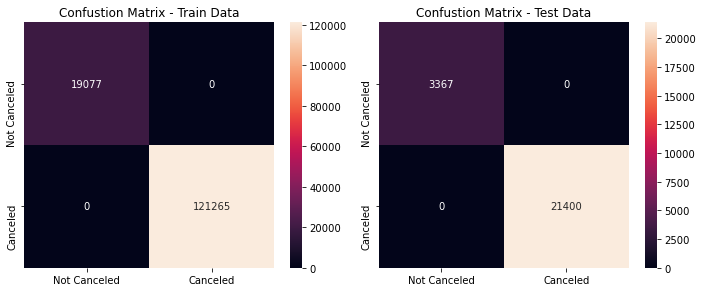

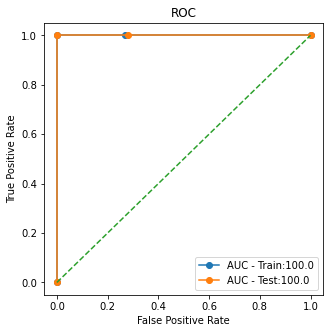

In [312]:
res_df = scores_train_test(gbcl,X_train_sc,X_test_sc,y_train,y_test,gbcl_y_predict_train,gbcl_y_predict_test,'Boost','GradientBoostingClassifier')

In [313]:
tempdf = pd.concat([tempdf,res_df])

In [314]:
report_gen(tempdf,True)

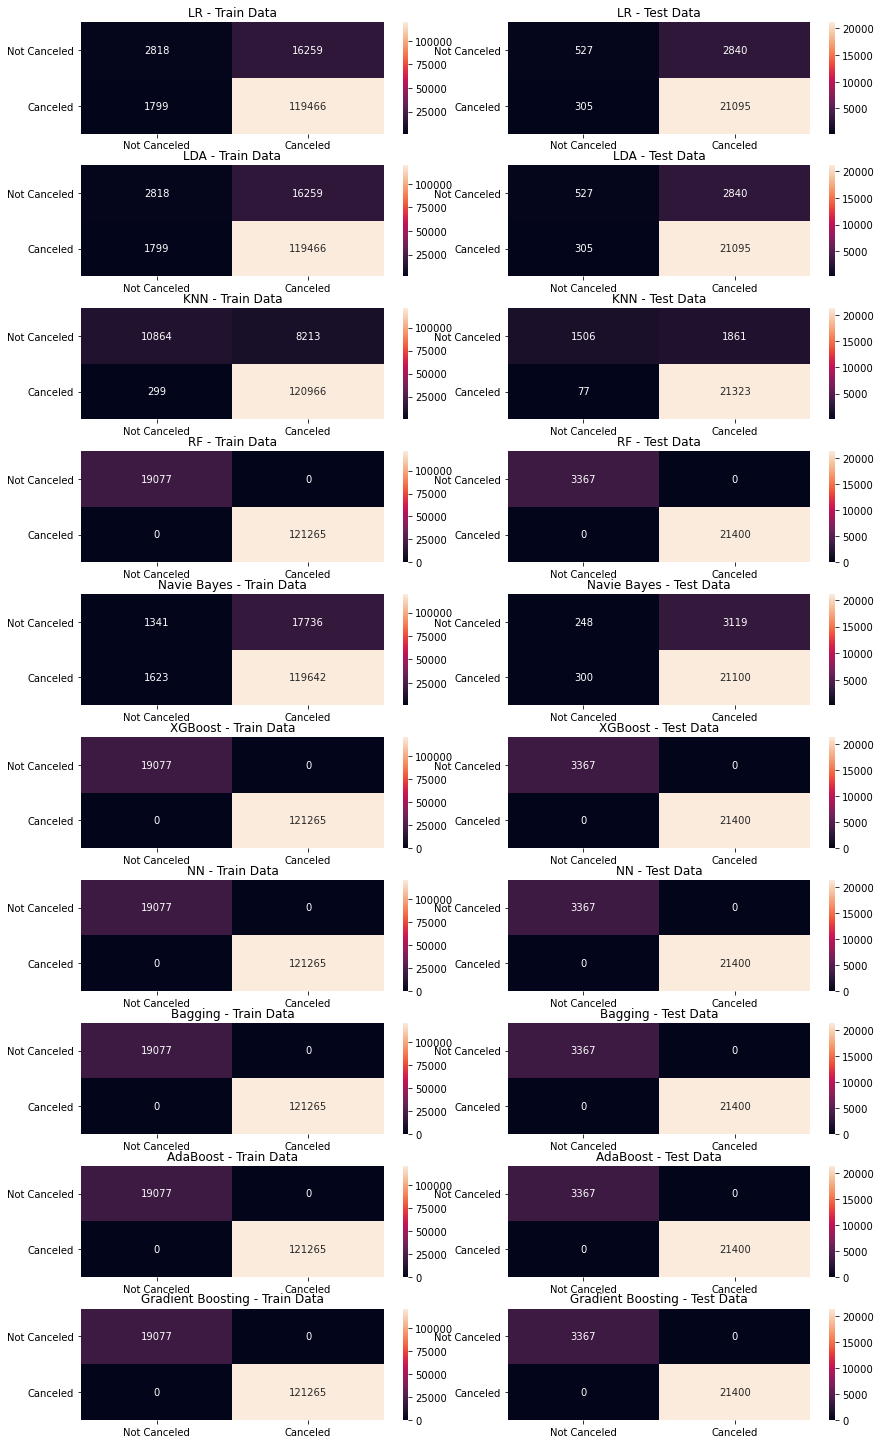

In [315]:
train_preds = [lgr_train,lda_model_ytrain_predict,KNN_train_p,rfcl_y_predict_train,NB_Model_y_predict_train,xgtrainpredict,NNTrainPredict,bgcl_y_predict_train,abcl_y_predict_train,gbcl_y_predict_train]

test_preds = [lgr_test,lda_model_ytest_predict,KNN_test_p,rfcl_y_predict_test,NB_Model_y_predict_test,xgtestpredict,NNTestPredict,bgcl_y_predict_test,abcl_y_predict_test,gbcl_y_predict_test]

mnames = ['LR','LDA','KNN','RF','Navie Bayes','XGBoost','NN','Bagging','AdaBoost','Gradient Boosting']

con_mat_r(y_train,train_preds,y_test,test_preds,2,12,20,mnames)

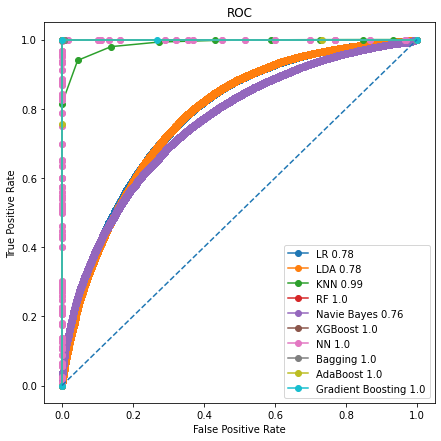

In [316]:
models=[lgr_model,lda_model,KNN_Model,rfcl,NB_model,xgbcl,NNModel,bgcl,abcl,gbcl]
plt.figure(figsize=(7,7))

c=0
for m in models:
    tprobs, tauc, tfpr, ttpr = roc_model(m,X_train_sc,y_train)
    plt.plot(tfpr,ttpr, marker='o', label=mnames[c] + ' ' + str(round(tauc,2)))
    
    c=c+1

plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')

plt.show()

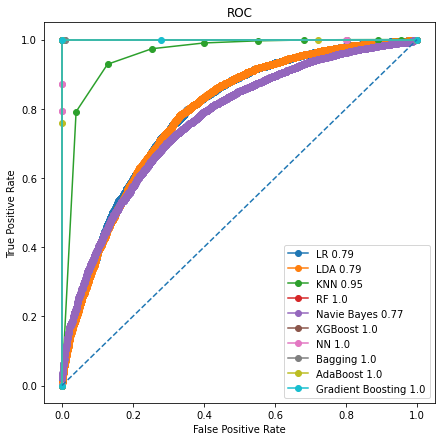

In [317]:
plt.figure(figsize=(7,7))
c=0
for m in models:
    tprobs, tauc, tfpr, ttpr = roc_model(m,X_test_sc,y_test)
    plt.plot(tfpr,ttpr, marker='o', label=mnames[c] + ' ' + str(round(tauc,2)))
    
    c=c+1

plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')

plt.show()

In [126]:
dfana['W2']=dfana['activity_type']
dfana['W2']=dfana['W2'].apply(lambda x: 19 if x=='subpage' else x)
dfana['W2']=dfana['W2'].apply(lambda x: 14 if x=='url' else x)
dfana['W2']=dfana['W2'].apply(lambda x: 16 if x=='homepage' else x)
dfana['W2']=dfana['W2'].apply(lambda x: 18 if x=='forumng' else x)
dfana['W2']=dfana['W2'].apply(lambda x: 14 if x=='quiz' else x)
dfana['W2']=dfana['W2'].apply(lambda x: 17 if x=='oucontent' else x)
dfana['W2']=dfana['W2'].apply(lambda x: 13 if x=='ouwiki' else x)
dfana['W2']=dfana['W2'].apply(lambda x: 15 if x=='resource' else x)
dfana['W2']=dfana['W2'].apply(lambda x: 12 if x=='questionnaire' else x)
dfana['W2']=dfana['W2'].apply(lambda x: 5 if x=='folder' else x)
dfana['W2']=dfana['W2'].apply(lambda x: 13 if x=='page' else x)
dfana['W2']=dfana['W2'].apply(lambda x: 3 if x=='ouelluminate' else x)
dfana['W2']=dfana['W2'].apply(lambda x: 11 if x=='externalquiz' else x)
dfana['W2']=dfana['W2'].apply(lambda x: 9 if x=='glossary' else x)
dfana['W2']=dfana['W2'].apply(lambda x: 7 if x=='dualpane' else x)
dfana['W2']=dfana['W2'].apply(lambda x: 8 if x=='dataplus' else x)
dfana['W2']=dfana['W2'].apply(lambda x: 10 if x=='oucollaborate' else x)
dfana['W2']=dfana['W2'].apply(lambda x: 6 if x=='htmlactivity' else x)
dfana['W2']=dfana['W2'].apply(lambda x: 4 if x=='sharedsubpage' else x)


In [128]:
dfana['W4']=dfana['final_result']
dfana['W4']=dfana['W4'].apply(lambda x: 3 if x=='Withdrawn' else x)
dfana['W4']=dfana['W4'].apply(lambda x: 4 if x=='Pass' else x)
dfana['W4']=dfana['W4'].apply(lambda x: 2 if x=='Fail' else x)
dfana['W4']=dfana['W4'].apply(lambda x: 5 if x=='Distinction' else x)

In [135]:
W1 = -5
W3 = dfana['activity_type'].value_counts()

In [137]:
dfana['W3']=dfana['activity_type'].apply(lambda x: W3[x])

In [140]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
dfana['activity_type']= label_encoder.fit_transform(dfana['activity_type'])
 
dfana['activity_type'].unique()

array([17, 18,  6,  4, 14,  9, 11, 15, 13,  3, 12, 10,  2,  5,  1,  0,  8,
        7, 16])

In [141]:
dfana['final_result']= label_encoder.fit_transform(dfana['final_result'])
 
dfana['final_result'].unique()

array([3, 2, 1, 0])

In [142]:
dfana.head()

,code_module,code_presentation,id_student,id_site,date_assignment,sum_click,activity_type,id_assessment,assessment_type,weight,...,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_unregistration,ValidatePass,W2,W3,W4
0,FFF,2013J,601180,716643,153,1,17,34873,TMA,12.5,...,0,60,N,3,-45.0,186.0,0,19,34738,3
1,DDD,2013B,369908,547945,140,1,17,25346,CMA,3.0,...,0,60,N,2,-82.0,NaN,1,19,34738,4
2,EEE,2014B,485920,790934,102,1,18,30714,TMA,16.0,...,0,30,N,2,-22.0,NaN,1,14,6808,4
3,DDD,2013B,2501479,547816,1,2,18,25343,CMA,3.0,...,0,60,N,1,-24.0,NaN,0,14,6808,2
4,DDD,2013J,498821,673519,-15,1,6,25348,TMA,10.0,...,0,60,N,2,-203.0,NaN,1,16,28098,4


In [143]:
y = dfana['date_assignment'] * W1 + dfana['sum_click'] * dfana['W2'] + dfana['W3'] + dfana['final_result'] * dfana['W4']

In [162]:
dfana['KPI']= y
df['W2']=dfana['W2']
df['W3']=dfana['W3']
df['W4']=dfana['W4']
df['actlab']=dfana['activity_type']
df['finlab']=dfana['final_result']

In [164]:
dfresana = df[['date_assignment','sum_click','W2','activity_type','actlab','W3','final_result','finlab','W4','KPI']]

In [167]:
dfresana

,date_assignment,sum_click,W2,activity_type,actlab,W3,final_result,finlab,W4,KPI
0,153,1,19,subpage,17,34738,Withdrawn,3,3,34001
1,140,1,19,subpage,17,34738,Pass,2,4,34065
2,102,1,14,url,18,6808,Pass,2,4,6320
3,1,2,14,url,18,6808,Fail,1,2,6833
4,-15,1,16,homepage,6,28098,Pass,2,4,28197
...,...,...,...,...,...,...,...,...,...,...
165104,228,2,13,ouwiki,11,2286,Distinction,0,5,1172
165105,20,8,16,homepage,6,28098,Distinction,0,5,28126
165106,40,4,16,homepage,6,28098,Pass,2,4,27970
165107,-10,1,14,url,18,6808,Pass,2,4,6880
